# Y.Afisha

<b>
Objetivo: ajudar a empresa a otimizar suas despesas com marketing.

Descrição dos dados:

- A tabela visits (os logs do servidor com dados sobre os visits ao site):
 - Uid — identificador unívoco do usuário
 - Device — dispositivo do usuário
 - Start Ts — data e hora do início da sessão
 - End Ts — data e hora do final da sessão
 - Source Id — identificador da origem do anúncio através do qual o usuário chegou
 - Todas as datas nesta tabela estão no formato YYYY-MM-DD.
 
- A tabela orders (dados sobre os pedidos):
 - Uid — identificador unívoco do usuário que faz um pedido
 - Buy Ts — data e hora do pedido
 - Revenue — a receita da Y.Afisha com o pedido
 
- A tabela costs (dados sobre as despesas com marketing):
 - source_id — identificador da origem de anúncio
 - dt — data
 - costs — despesas com esta origem de anúncio neste dia
 

Instruções para completar o projeto:

- Carregue os dados e prepare-os para a análise
- Armazene os dados sobre os visits, pedidos e despesas em variáveis. Otimize os dados para a análise. Certifique-se de que  -cada coluna contém o tipo correto de dados.

Faça relatórios e calcule as métricas:

- Produto
   - Quantas pessoas usam-no cada dia, semana e mês?
   - Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
   - Que comprimento tem cada sessão?
   - Com que frequência os usuários voltam?

- Vendas
   - Quando as pessoas começam a comprar? (Na análise de KPIs, nós geralmente estamos interessados em saber o período de tempo entre o registro e a conversão - quando o usuário se torna um cliente. Por exemplo, se o registro e a primeira compra de um usuário ocorrem no mesmo dia, ele pode encaixar na categoria de Conversão 0d. Se a compra é realizada no dia seguinte, isso será a Conversão 1d. Você pode usar qualquer abordagem que permita comparar as conversões de diferentes coortes, para que você possa determinar qual coorte ou canal de marketing tem a maior eficiência)
   - Quantos pedidos os clientes fazem durante um determinado período de tempo?
   - Qual é o volume médio de uma compra?
   - Quanto dinheiro eles trazem para a empresa (LTV)?

- Marketing
   - Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo
   - Quanto custou a aquisição de clientes para cada origem?
   - Os investimentos valeram a pena? (ROI)

Construa gráficos para ver como essas métricas diferem para vários dispositivos e diferentes origens de anúncios e como elas mudam com o tempo.

Escreva uma conclusão: recomende aos especialistas de marketing quanto dinheiro e onde seria melhor investir.

<b>Quais origens/plataformas você recomendaria? Fundamente sua escolha: em quais métricas você se concentrou? Por quê? Que conclusões você tirou ao encontrar os valores das métricas?

## Início

### Carregando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.9.5.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.242-156.349.amzn2.x86_64
Version          : #1 SMP Tue May 23 18:48:04 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.2.4
numpy            : 1.21.1
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.1.3
setuptools       : 49.6.0.post20210108
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : 2.9.2 (dt dec pq3 ext lo64)
jinja2           : 3.0.1
IPython          : 7.25.0
pandas_datareader: None
bs4             

### Carregando bases de dados

In [3]:
#Carregando os arquivos .csv
visits = pd.read_csv('/datasets/visits_log_us.csv', skipinitialspace=True)
orders = pd.read_csv('/datasets/orders_log_us.csv', skipinitialspace=True)
costs = pd.read_csv('/datasets/costs_us.csv', skipinitialspace=True)

## Explorando os dados

### Informações gerais / resumidas

In [4]:
#Amostra do conjunto de dados
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [7]:
#Informações gerais
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
#Descrição Geral
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [13]:
#Verficando valores ausentes
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [14]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [15]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [16]:
#Valores duplicados
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

Pelas informações detalhadas dos arquivos 'visits','orders' e 'costs', percebe-se a consistência dos dados, pois não há valores duplicados, não há valores nulos ou ausentes. Nas colunas onde há informações de data nos conjuntos de dados, será feito a alteração do tipo de dado, pois está como tipo 'object'. Será feito alterações nos nomes das colunas para mater o padrão de boas práticas.

### Corrigindo os dados

#### Alterando o tipo de dado das colunas

In [19]:
#Corrigindo as colunas date
visits['End Ts'] = pd.to_datetime(visits['End Ts'],errors ='coerce', format="%Y-%m-%d %H:%M:%S")
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'],errors ='coerce', format="%Y-%m-%d %H:%M:%S")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [20]:
#Descrição da coluna 'End Ts'(Warning causado pela versão antiga do pandas (verificado acima - .show_version, conforme biblioteca consultada)
visits['End Ts'].describe()

/tmp/ipykernel_82/3563404740.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits['End Ts'].describe()


count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: End Ts, dtype: object

In [21]:
#Corrigindo o formato da colyna 'Buy Ts'
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'],errors ='coerce',format="%Y-%m-%d %H:%M:%S")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [22]:
#Descrição da coluna 'Buy Ts'(Warning causado pela versão antiga do pandas (verificado acima - .show_version, conforme biblioteca consultada)
orders['Buy Ts'].describe()

/tmp/ipykernel_82/555585686.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['Buy Ts'].describe()


count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

In [23]:
#Corrigindo o formato da coluna 'dt'
costs['dt'] = pd.to_datetime(costs['dt'],errors ='coerce',format="%Y-%m-%d %H:%M:%S")
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [24]:
#Descrição da coluna 'dt'(Warning causado pela versão antiga do pandas (verificado acima - .show_version, conforme biblioteca consultada)
costs['dt'].describe()

/tmp/ipykernel_82/3418492340.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costs['dt'].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Verificando os conjuntos de dados aplicando o método .decribe(), nota-se que há simetria nas datas de início (2017-06-01) e fim (2018-06-01) das três bases. 

#### Renomeando e reorganizando as colunas

In [25]:
#Renomeando as colunas do arquivo 'visits'
visits = visits.rename(columns = {'Device':'device', 'End Ts':'end_ts','Source Id':'source_id','Start Ts':'start_ts','Uid':'uid'})

In [26]:
#Renomeando as colunas do arquivo 'orders'
orders = orders.rename(columns = {'Buy Ts':'buy_ts','Revenue':'revenue','Uid':'uid'})

In [27]:
#Reorganizando as colunas
visits = visits.iloc[:,[4,2,0,3,1]]
visits.head()

,uid,source_id,device,start_ts,end_ts
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00


In [28]:
#Organizando as colunas
orders = orders[['uid','revenue','buy_ts']]
orders.head()

,uid,revenue,buy_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [29]:
#Organizando as colunas
costs = costs[['source_id','costs','dt']]
costs.head()

,source_id,costs,dt
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05


## Métricas dos Usuários

### Produto

#### Utilização diária, dia da semana e mensal

Para verificar a popularidade e sucesso da plataforma, é necessário avaliar as atividades diária, dia da semana e mensal dos usuários. Para isso, há três métricas principais que descrevem esse comportamento:
 - DAU - número de usuários univocos ativos diário
 - WAU - número de usuários unívocos ativos por dia da semana
 - MAU - número de usuários unívocos ativos mensal
 
Para isso será criado as colunas 'visits_date', 'visits_week' e 'visits_month' separando as respectivas informações da coluna 'start_ts'

In [30]:
#Encontrando o número de usuários ativos - base de dados 'visits'
visits['visits_date'] = visits['start_ts'].dt.date
visits['visits_week'] = pd.to_datetime(visits['start_ts']).dt.strftime('%y/%V')
visits['visits_weekday'] = visits['start_ts'].dt.day_name()
visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')

In [31]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   uid             359400 non-null  uint64        
 1   source_id       359400 non-null  int64         
 2   device          359400 non-null  object        
 3   start_ts        359400 non-null  datetime64[ns]
 4   end_ts          359400 non-null  datetime64[ns]
 5   visits_date     359400 non-null  object        
 6   visits_week     359400 non-null  object        
 7   visits_weekday  359400 non-null  object        
 8   visits_month    359400 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4), uint64(1)
memory usage: 24.7+ MB


In [32]:
#Organizando as colunas
visits_date = visits[['uid','source_id','device','visits_date']]

In [33]:
#Renomeando as colunas
visits_date = visits_date.rename(columns = {'uid':'uid','source_id':'source_id','device':'device','visits_date':'date'})
visits_date

,uid,source_id,device,date
0,16879256277535980062,4,touch,2017-12-20
1,104060357244891740,2,desktop,2018-02-19
2,7459035603376831527,5,touch,2017-07-01
3,16174680259334210214,9,desktop,2018-05-20
4,9969694820036681168,3,desktop,2017-12-27
...,...,...,...,...
359395,18363291481961487539,2,desktop,2017-07-29
359396,18370831553019119586,1,touch,2018-01-25
359397,18387297585500748294,4,desktop,2018-03-03
359398,18388616944624776485,5,desktop,2017-11-02


In [34]:
#Agrupando por visitas diárias
total_dau = visits.groupby(['visits_date','visits_weekday']).agg({'uid':'nunique'}).mean()

In [35]:
total_dau.head()

uid    907.991758
dtype: float64

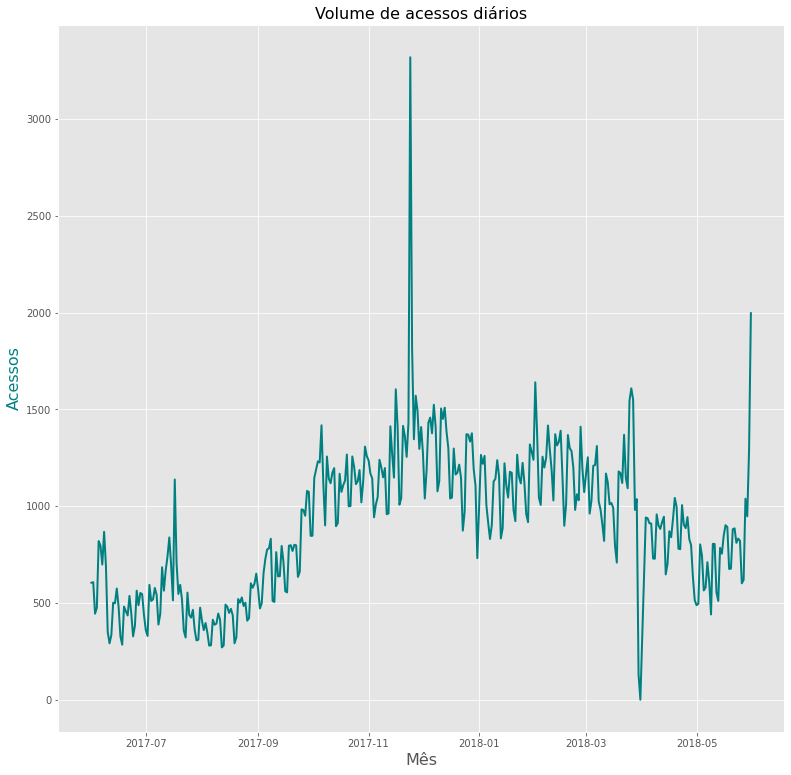

In [36]:
col1 = 'teal'
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=[13,13])
ax.plot(visits.groupby(['visits_date']).agg({'uid':'nunique'}), color=col1, linewidth=2)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Acessos', color=col1, fontsize=16)
ax.set_title("Volume de acessos diários",size=16)
plt.show()

In [37]:
visits_weekday = visits.groupby(['visits_date','visits_weekday']).agg({'uid':'nunique'}).reset_index()
visits_weekday['visits_weekday'] = visits_weekday['visits_weekday'].astype('object')
visits_weekday = visits_weekday.set_index('visits_date')
visits_weekday.head()

,visits_weekday,uid
visits_date,,
2017-06-01,Thursday,605
2017-06-02,Friday,608
2017-06-03,Saturday,445
2017-06-04,Sunday,476
2017-06-05,Monday,820


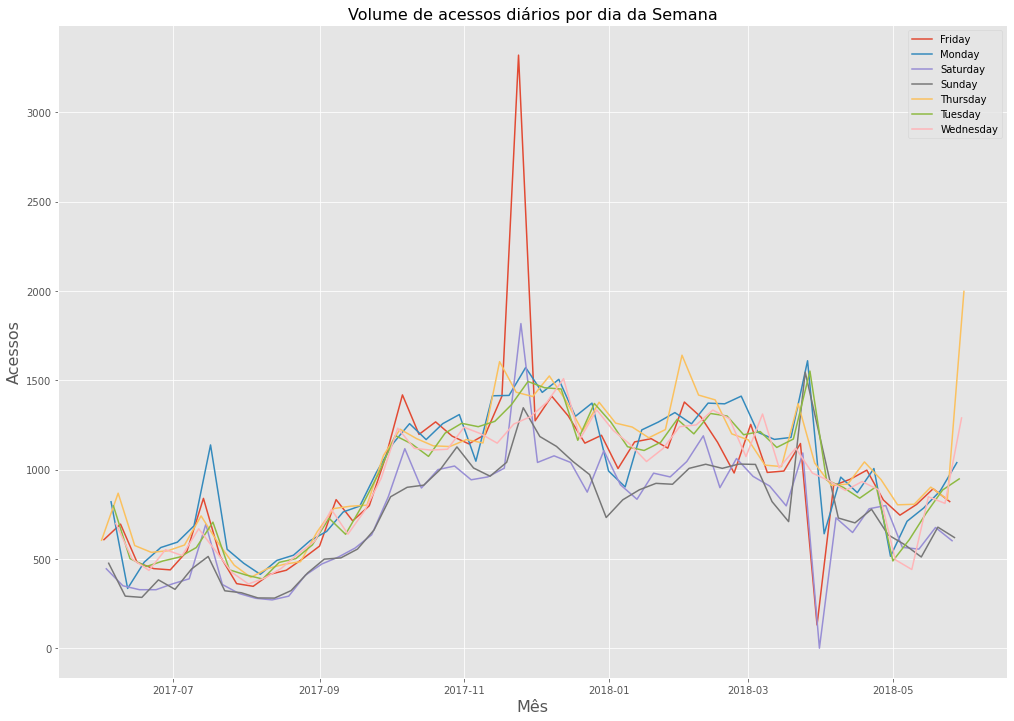

In [38]:
fig,ax = plt.subplots(figsize=[17,12])
visits_weekday.groupby("visits_weekday")["uid"].plot(legend=True, xlabel="visits_date", ylabel="Acessos")
plt.legend()
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Acessos', fontsize=16)
ax.set_title("Volume de acessos diários por dia da Semana",size=16)
plt.show()

In [39]:
#Agrupando por visitas semanais
total_wau = visits.groupby(['visits_date','visits_week']).agg({'uid':'nunique'}).reset_index()

In [40]:
total_wau.mean()

uid    907.991758
dtype: float64

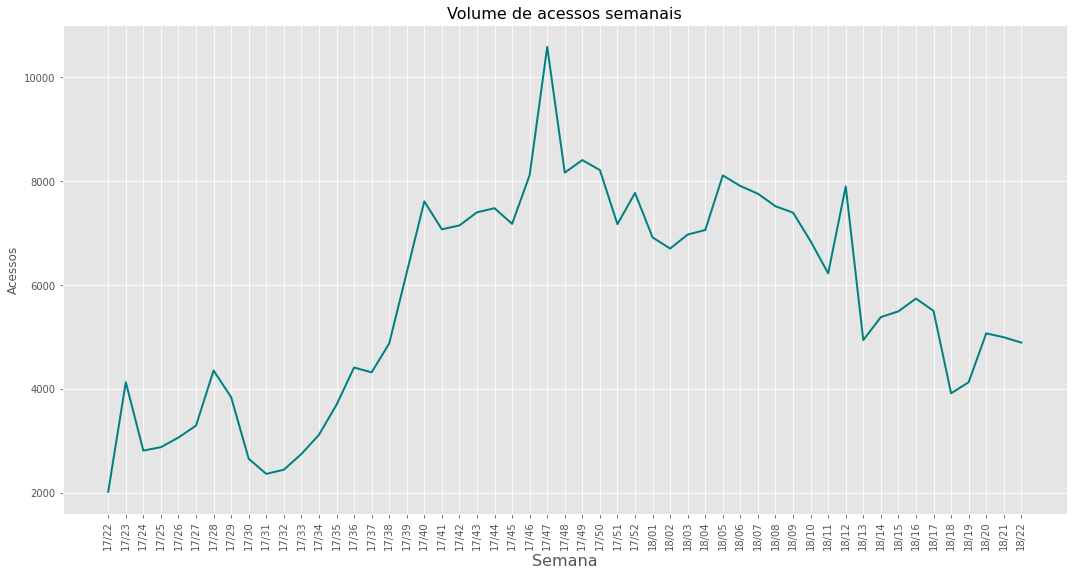

In [41]:
## col1 = 'teal'
fig,ax = plt.subplots(figsize=[18,9])
plt.rcParams.update({'font.size': 30})
ax.plot(visits.groupby(['visits_week']).agg({'uid':'nunique'}), color=col1, linewidth=2)

ax.set_xlabel('Semana', fontsize=16)
ax.set_ylabel('Acessos', fontsize=12)
ax.set_title("Volume de acessos semanais",size=16)
ax.xaxis.set_tick_params(rotation = 90)

plt.style.use("ggplot")

In [42]:
#Agrupando por visitas mensais
total_mau = visits.groupby('visits_month').agg({'uid':'nunique'})

In [43]:
total_mau.mean()

uid    23228.416667
dtype: float64

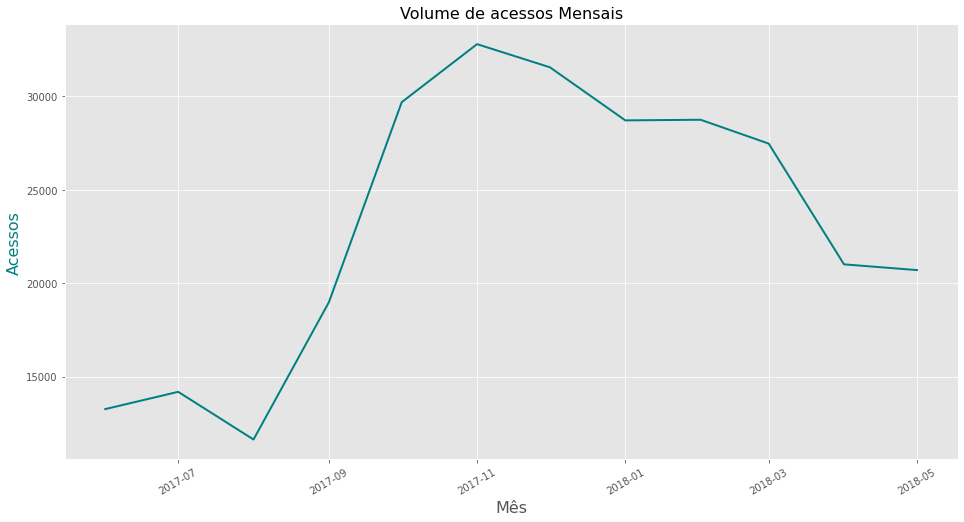

In [44]:
col1 = 'teal'
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=[16,8])
ax.plot(total_mau, color=col1, linewidth=2)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Acessos', color=col1, fontsize=16)
ax.set_title("Volume de acessos Mensais",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.show()

In [45]:
# Cálculo da taxa de retenção semanal
taxa_wau = (total_dau.mean()) / (total_wau.mean())*100
taxa_wau

uid    100.0
dtype: float64

In [46]:
#Cálculo da taxa de retenção Mensal
taxa_mau = (total_dau.mean()) / (total_mau.mean())*100
taxa_mau

uid    3.90897
dtype: float64

Pelos gráficos plotados das tabelas geradas por visitas diárias, semanais e mensais no período de 1 ano, é possivel verificar que:

 - no gráfico diário, nota-se pequenos picos positivos e negativos a longo do gráfico; do mês 6 até o final do ano o comportamento é de maneira ascendente e e janeiro o comportamento se inverte, mas permanecendo os pequenos picos. Ao plotar a tabela diária com os nomes dos dias verifica-se um certo padrão em relação aos pequenos picos e vales visto no gráfico. 
 - O gráfico "Volume e Acessos diários por dia da Semana" demonstra melhor esse comportamento sazonal, onde as linhas nas cores laranja, azul e amarela (sexta, segunda e quinta respectivamente) são os dias com maior acesso, diferente dos finais de semana (roxo-sábado e cinza-domingo)onde as linhas estão abaixo das demais no gráfico. 
 
 - já no gráfico semanal, é possivel verificar melhor o comportamento linear negativo, com a queda se iniciando na semana 22 tendo seu ponto mínimo a semana 31, tendo um aumento na semana 28 (junho a agosto)
  
 - no gráfico mensal, verifica-se o comportamento mês a mês do produto/serviço oferecido, com uma ascensão enorme a partir de agosto indo até novembro, onde é possivel constatar a preferência dos usuários nesse período. Nos demais meses há uma queda acentuada, com poucos picos ao longo do período, o que demostra que o produto/serviço é de um nicho bem específico tendo sua maior procura em um determinado período do ano.
 
 - foi calculado os valores das atividades diárias (DAU), semanal(WAU) e mensal(MAU) dos usuários. Após isso foi calculado a taxa de retorno semanal(taxa_wau) chegando em um valor de 100%, ou seja,  das pessoas que visitam a plataforma em média 100% delas retornam em uma semana a visitar a plataforma. Já para o cálculo da taxa de retorno mensal(taxa_mau) esse valor é de 3.9%.

#### Sessões dos usuários

A sessão do usuário é medida do momento da entrada na plataforma até o fechamento da mesma. Como o mesmo usuário pode entrar várias vezes, será calculado o valor único para cada usuário.

In [47]:
#Organizando pelo primeiro acesso do usuário
first_access = visits.groupby('uid').agg({'visits_date': 'min'}).reset_index()

In [48]:
first_access

,uid,visits_date
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30
...,...,...
228164,18446403737806311543,2017-11-30
228165,18446424184725333426,2017-12-06
228166,18446556406699109058,2018-01-01
228167,18446621818809592527,2017-12-27


In [49]:
#Agrupando os acessos semanais e mensais
sessions_per_user = visits.groupby(['visits_month', 'visits_week']).agg({'uid': ['count', 'nunique']})
sessions_per_user.head()

uid        
                         count nunique
visits_month visits_week              
2017-06-01   17/22        2309    2021
             17/23        4931    4129
             17/24        3214    2812
             17/25        3273    2878
             17/26        2778    2435

In [50]:
#Renomeando as colunas
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

In [51]:
sessions_per_user

n_sessions  n_users  sess_per_user
visits_month visits_week                                    
2017-06-01   17/22              2309     2021       1.142504
             17/23              4931     4129       1.194236
             17/24              3214     2812       1.142959
             17/25              3273     2878       1.137248
             17/26              2778     2435       1.140862
...                              ...      ...            ...
2018-05-01   18/18              3947     3462       1.140092
             18/19              4803     4128       1.163517
             18/20              6094     5070       1.201972
             18/21              5934     4995       1.187988
             18/22              5857     4892       1.197261

[62 rows x 3 columns]

In [52]:
sessions_per_user['sess_per_user'].mean()

1.1658006345986058

Pelos filtros realizados nas tabelas, verifica-se que pouco mais de uma sessão por usuário por semana na plataforma.

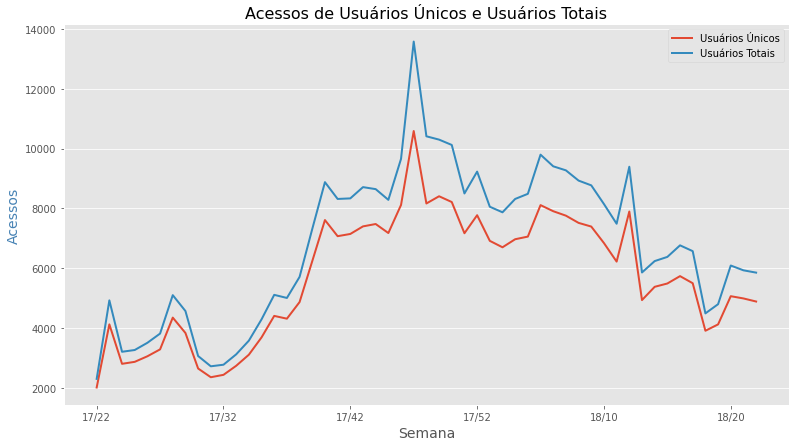

In [53]:
col1 = 'steelblue'
col2 = 'darkred'

sessions_per_user_ = visits.groupby('visits_week').agg({'uid': 'nunique'}).reset_index()
sessions_per_user_1 = visits.groupby('visits_week').agg({'uid': 'count'}).reset_index()

ax = sessions_per_user_.plot(x='visits_week', y='uid',linewidth=2, label='Usuários Únicos',figsize=(13, 7))
sessions_per_user_1.plot(ax=ax, x='visits_week', y='uid', linewidth=2, label='Usuários Totais')
ax.set_xlabel('Semana', fontsize=14)
ax.set_ylabel('Acessos', color=col1, fontsize=14)

ax.set_title("Acessos de Usuários Únicos e Usuários Totais",size=16)
plt.grid(axis="x")
plt.legend()
plt.style.use("ggplot")
plt.show()

In [54]:
#Agrupando os acessos diários
sessions_per_user_day = visits.groupby(['visits_date']).agg({'uid': ['count', 'nunique']})
sessions_per_user_day.head()

uid        
            count nunique
visits_date              
2017-06-01    664     605
2017-06-02    658     608
2017-06-03    477     445
2017-06-04    510     476
2017-06-05    893     820

In [55]:
#Renomeando as colunas
sessions_per_user_day.columns = ['n_sessions', 'n_users']
sessions_per_user_day['sess_per_user_day'] = (sessions_per_user_day['n_sessions'] / sessions_per_user_day['n_users'])

In [56]:
sessions_per_user_day.head()

,n_sessions,n_users,sess_per_user_day
visits_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [57]:
sessions_per_user_day['sess_per_user_day'].mean()

1.082169644003972

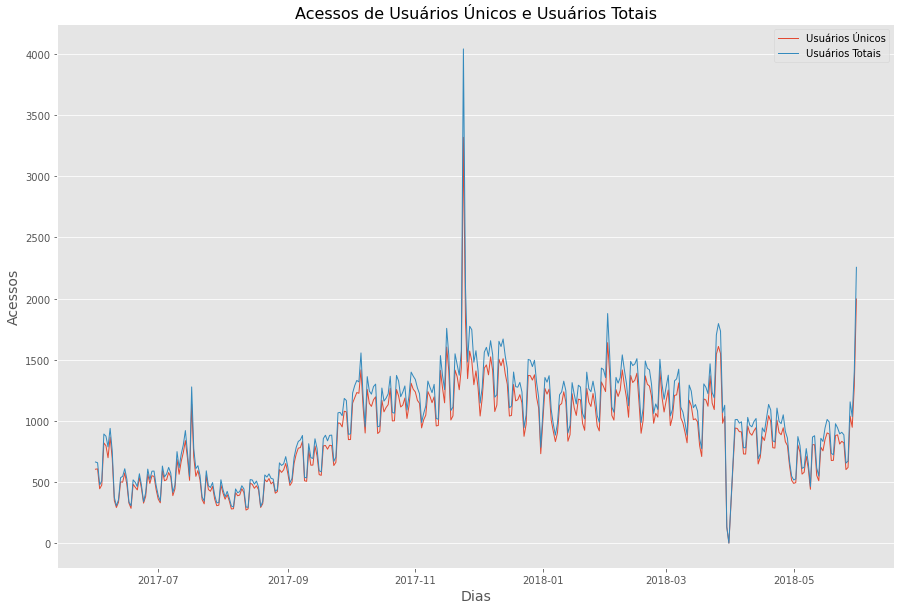

In [58]:
col1 = 'steelblue'
col2 = 'darkred'

sessions_per_user_day_ = visits.groupby('visits_date').agg({'uid': 'nunique'}).reset_index()
sessions_per_user_day_1 = visits.groupby('visits_date').agg({'uid': 'count'}).reset_index()

ax = sessions_per_user_day_.plot(x='visits_date', y='uid',linewidth=1, label='Usuários Únicos',figsize=(15, 10))
sessions_per_user_day_1.plot(ax=ax, x='visits_date', y='uid', linewidth=1, label='Usuários Totais')
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Acessos', fontsize=14)

ax.set_title("Acessos de Usuários Únicos e Usuários Totais",size=16)
plt.grid(axis="x")
plt.legend()
plt.style.use("ggplot")
plt.show()

Pelos gráficos semanais e diários acima plotados onde é possivel notar um comportamento semelhante entre os usuários que acessam a plataforma pela primeira vez e aqueles que acessam mais de uma vez, seja o acesso computado diário ou semanalmente. 

#### Duração das sessões

In [59]:
#Calculando a duração de cada acesso
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...
359395,18363291481961487539,2,desktop,2017-07-29 19:07:00,2017-07-29 19:07:19,2017-07-29,17/30,Saturday,2017-07-01,19
359396,18370831553019119586,1,touch,2018-01-25 17:38:00,2018-01-25 17:38:19,2018-01-25,18/04,Thursday,2018-01-01,19
359397,18387297585500748294,4,desktop,2018-03-03 10:12:00,2018-03-03 10:12:19,2018-03-03,18/09,Saturday,2018-03-01,19
359398,18388616944624776485,5,desktop,2017-11-02 10:12:00,2017-11-02 10:12:19,2017-11-02,17/44,Thursday,2017-11-01,19


In [60]:
visits['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

In [61]:
#Cálculo da média
visits.groupby('visits_week')['session_duration_sec'].mean().head()

visits_week
17/22    616.071460
17/23    621.871831
17/24    589.705974
17/25    559.563092
17/26    594.362834
Name: session_duration_sec, dtype: float64

In [62]:
#Cálculo da mediana
visits.groupby('visits_week')['session_duration_sec'].median().head()

visits_week
17/22    300
17/23    300
17/24    240
17/25    240
17/26    240
Name: session_duration_sec, dtype: int64

In [63]:
#Cálculo da moda
visits.groupby('visits_week')['session_duration_sec'].agg(pd.Series.mode).head()

visits_week
17/22    60
17/23    60
17/24    60
17/25    60
17/26    60
Name: session_duration_sec, dtype: int64

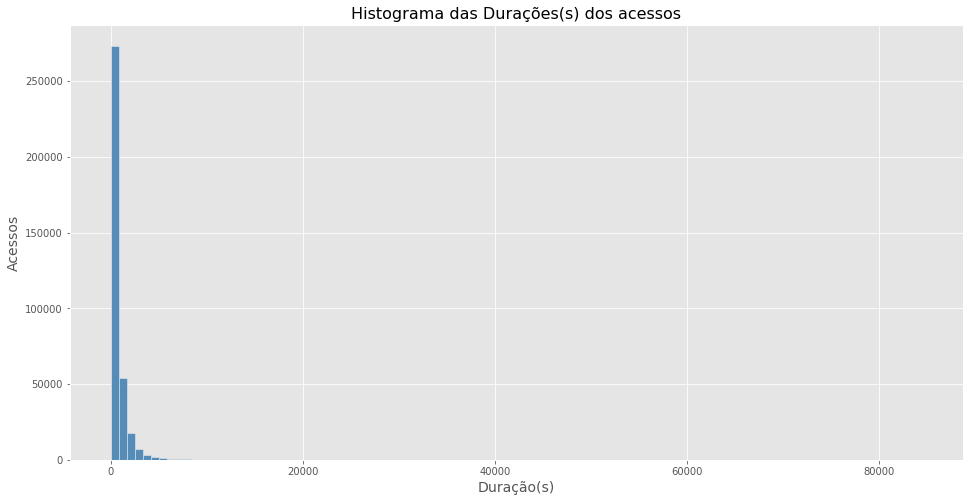

In [64]:
fig,ax = plt.subplots(figsize=[16,8])
sns.histplot(ax=ax,data=visits,x='session_duration_sec', bins=100,color='steelblue', alpha=0.9)
ax.set_xlabel('Duração(s)', fontsize=14)
ax.set_ylabel('Acessos', fontsize=14)
ax.set_title("Histograma das Durações(s) dos acessos",size=16)
plt.show()

Pelo histograma acima plotado da "Duração(s) das visitas semanais", percebe-se a variabilidade dos dados. Acima também foram geradas as tabelas de Media da duração(s) das visitas semanais, Mediana da duração(s) das visitas semanais e Moda da duração(s) das visitas semanais, onde verifica-se um range grande nos valores, mesmo nas médias e medianas. Como a moda é uma medida de tendência central e destaca o elemento com maior frequência em um conjunto de dados, pode-se utilizá-la para determinar o tempo médio de duração das sessões. 

### Calculando Taxa de Retenção e Índice de Cancelamento

Para verificar a popularidade e assiduidade dos usuários em um aplicativo ou plataforma, é necessário calcular o Índice de Retenção e a Taxa de Cancelamento. Índice de Retenção fornece uma informação importante que é a quantidade de usuários de uma determinada cohort que permanecem ativos comparado com a quantidade inicial.

#### Taxa de Retenção

In [65]:
visits.head()

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0


In [66]:
#Criando uma coluna com a data do primeiro acesso a plataforma 
first_activity_date = visits.groupby(['uid'])['visits_date'].min()
first_activity_date.name = 'first_activity_date'
visits_week = visits.join(first_activity_date,on='uid') 

In [67]:
visits_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uid                   359400 non-null  uint64        
 1   source_id             359400 non-null  int64         
 2   device                359400 non-null  object        
 3   start_ts              359400 non-null  datetime64[ns]
 4   end_ts                359400 non-null  datetime64[ns]
 5   visits_date           359400 non-null  object        
 6   visits_week           359400 non-null  object        
 7   visits_weekday        359400 non-null  object        
 8   visits_month          359400 non-null  datetime64[ns]
 9   session_duration_sec  359400 non-null  int64         
 10  first_activity_date   359400 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(5), uint64(1)
memory usage: 30.2+ MB


Como verificou-se acima uma variação grande na quantidade de acessos dos usuários, serão criadas cohorts semanais com o intuito de obter uma melhor precisão nos dados e na análise

In [68]:
visits_week.head()

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec,first_activity_date
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080,2017-12-20
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680,2018-02-19
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0,2017-07-01
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440,2018-03-09
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0,2017-12-27


In [69]:
#Alterando o tipo de dado das colunas
visits_week['first_activity_date'] = pd.to_datetime(visits_week['first_activity_date'])
visits_week['visits_date'] = pd.to_datetime(visits_week['visits_date'])

In [70]:
visits_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   uid                   359400 non-null  uint64        
 1   source_id             359400 non-null  int64         
 2   device                359400 non-null  object        
 3   start_ts              359400 non-null  datetime64[ns]
 4   end_ts                359400 non-null  datetime64[ns]
 5   visits_date           359400 non-null  datetime64[ns]
 6   visits_week           359400 non-null  object        
 7   visits_weekday        359400 non-null  object        
 8   visits_month          359400 non-null  datetime64[ns]
 9   session_duration_sec  359400 non-null  int64         
 10  first_activity_date   359400 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(3), uint64(1)
memory usage: 30.2+ MB


In [71]:
#Calculando a diferença entre as datas da semana por timedelta
visits_week['activity_week'] = pd.to_datetime(visits_week['visits_date'], unit='d') - pd.to_timedelta(visits_week['visits_date'].dt.dayofweek, unit='d')

In [72]:
visits_week.head()

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec,first_activity_date,activity_week
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080,2017-12-20,2017-12-18
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680,2018-02-19,2018-02-19
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0,2017-07-01,2017-06-26
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440,2018-03-09,2018-05-14
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0,2017-12-27,2017-12-25


In [73]:
#Calculando entre o primeiro acesso e o acesso semanal por timedelta
visits_week['first_activity_week'] = pd.to_datetime(visits_week['first_activity_date'], unit='d') - pd.to_timedelta(visits_week['first_activity_date'].dt.dayofweek, unit='d') 

In [74]:
visits_week.head()

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec,first_activity_date,activity_week,first_activity_week
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080,2017-12-20,2017-12-18,2017-12-18
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680,2018-02-19,2018-02-19,2018-02-19
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0,2017-07-01,2017-06-26,2017-06-26
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440,2018-03-09,2018-05-14,2018-03-05
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0,2017-12-27,2017-12-25,2017-12-25


In [75]:
#Criando a cohort semanal e calculando a atividade do usuário
visits_week['cohort_lifetime'] = visits_week['activity_week'] - visits_week['first_activity_week']
visits_week['cohort_lifetime'] = visits_week['cohort_lifetime'] / np.timedelta64(1,'W')
visits_week['cohort_lifetime'] = visits_week['cohort_lifetime'].astype(int)

In [76]:
visits_week.head(5)

,uid,source_id,device,start_ts,end_ts,visits_date,visits_week,visits_weekday,visits_month,session_duration_sec,first_activity_date,activity_week,first_activity_week,cohort_lifetime
0,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,17/51,Wednesday,2017-12-01,1080,2017-12-20,2017-12-18,2017-12-18,0
1,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,18/08,Monday,2018-02-01,1680,2018-02-19,2018-02-19,2018-02-19,0
2,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,17/26,Saturday,2017-07-01,0,2017-07-01,2017-06-26,2017-06-26,0
3,16174680259334210214,9,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,18/20,Sunday,2018-05-01,1440,2018-03-09,2018-05-14,2018-03-05,10
4,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,17/52,Wednesday,2017-12-01,0,2017-12-27,2017-12-25,2017-12-25,0


In [77]:
#Agrupando os acessos semanais únicos
cohorts = (visits_week.groupby(['first_activity_week', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()) 

In [78]:
#Criando as cohorts semanais da primeira visita
initial_visits_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'uid']]
initial_visits_count = initial_visits_count.rename(columns={'uid': 'cohort_users'}) 

In [79]:
#Juntado os conjuntos de dados
cohorts = cohorts.merge(initial_visits_count, on='first_activity_week') 

In [80]:
#Calculando o índice de retenção do período
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 

In [81]:
cohorts.head()

,first_activity_week,cohort_lifetime,uid,cohort_users,retention
0,2017-05-29,0,2021,2021,1.000000
1,2017-05-29,1,185,2021,0.091539
2,2017-05-29,2,98,2021,0.048491
3,2017-05-29,3,74,2021,0.036616
4,2017-05-29,4,88,2021,0.043543


In [82]:
#Agrupando a tabela por cohorts e somando os valores
visits_retention = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='retention',aggfunc='sum').round(3).fillna('')*100

In [83]:
visits_retention.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,100.0,9.2,4.8,3.7,4.4,4.1,3.7,3.6,2.9,2.2,...,2.9,2.2,2.7,2.8,2.9,2.2,2.4,3.0,3.0,2.3
2017-06-05,100.0,3.7,2.9,2.5,2.2,2.5,2.2,1.7,1.5,1.8,...,1.5,1.5,1.9,1.3,1.3,1.3,1.9,1.8,1.5,
2017-06-12,100.0,4.1,2.6,2.3,2.2,2.0,1.6,1.6,1.3,1.8,...,1.4,1.2,1.1,1.1,1.1,1.0,1.4,0.8,,
2017-06-19,100.0,3.6,2.4,2.4,2.3,1.5,1.3,0.8,1.0,1.4,...,1.2,1.2,1.0,0.7,1.0,1.0,0.7,,,
2017-06-26,100.0,3.9,2.6,2.0,1.5,1.3,1.1,1.1,1.4,1.5,...,0.6,0.5,0.7,0.9,1.0,1.0,,,,


In [84]:
#Selecionando a data 2017-05-29 (período)
visits_retention_201706 = visits_retention.loc['2017-05-29'].mean()*100
visits_retention_201706

541.1320754716979

In [85]:
#Calculando a média da cohort 1 de todo o período 
cohorts.loc[(cohorts['cohort_lifetime']==1),'retention'].mean()*100

3.921045654988639

In [86]:
#Selecionando a cohort 1 de todo o período
cohort_retention = (cohorts.query('cohort_lifetime == 1').groupby('first_activity_week')['retention']).mean()*100
cohort_retention

first_activity_week
2017-05-29    9.153884
2017-06-05    3.727181
2017-06-12    4.090378
2017-06-19    3.558994
2017-06-26    3.864556
2017-07-03    4.659993
2017-07-10    3.839170
2017-07-17    3.377967
2017-07-24    2.442396
2017-07-31    3.367876
2017-08-07    3.196803
2017-08-14    3.355705
2017-08-21    3.817395
2017-08-28    3.761135
2017-09-04    3.927069
2017-09-11    4.141674
2017-09-18    4.429902
2017-09-25    3.958456
2017-10-02    4.194815
2017-10-09    4.514073
2017-10-16    4.465710
2017-10-23    4.265159
2017-10-30    4.257511
2017-11-06    4.317343
2017-11-13    5.496086
2017-11-20    5.072010
2017-11-27    5.805687
2017-12-04    4.927825
2017-12-11    3.584841
2017-12-18    4.020482
2017-12-25    2.705031
2018-01-01    3.019370
2018-01-08    4.182350
2018-01-15    3.467517
2018-01-22    4.250692
2018-01-29    4.747424
2018-02-05    3.823115
2018-02-12    3.899417
2018-02-19    3.321313
2018-02-26    3.249168
2018-03-05    3.940784
2018-03-12    4.000936
2018-03-19    

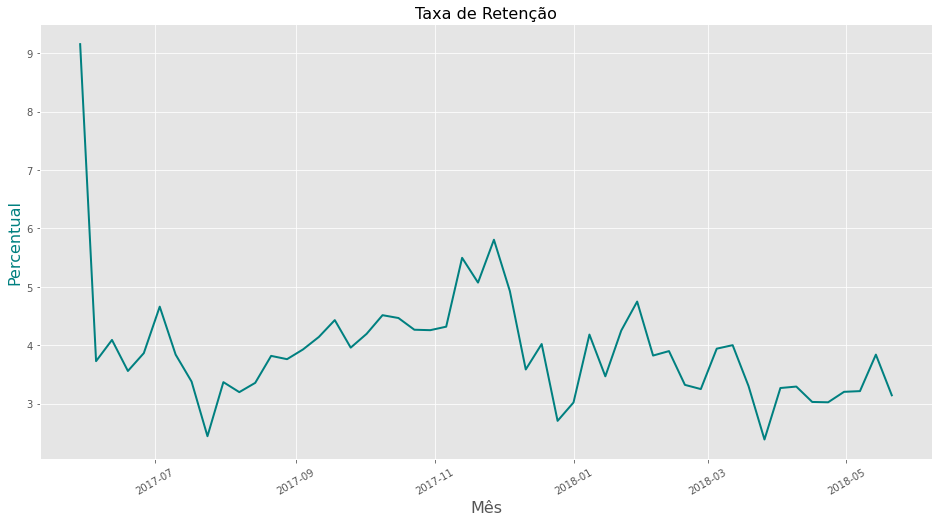

In [87]:
col1 = 'teal'
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=[16,8])
ax.plot(cohort_retention, color=col1, linewidth=2)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Percentual', color=col1, fontsize=16)
ax.set_title("Taxa de Retenção",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.show()

Pelas tabelas e graficos pltados acima, percebe-se o comportamento da taxa de retenção se usuários na plataforma ao longo do período. Os pontos mais críticos que demandam atenção são os meses de agosto, dezembro e março, onde a cuva atinge seus valores mínimos. Já o melhor período de retenção dos usuários é no mês de novembro.

#### Índice de Cancelamento

In [88]:
cohorts['churn_rate'] = cohorts.groupby(['first_activity_week'])['uid'].pct_change() 

In [89]:
cohorts

,first_activity_week,cohort_lifetime,uid,cohort_users,retention,churn_rate
0,2017-05-29,0,2021,2021,1.000000,NaN
1,2017-05-29,1,185,2021,0.091539,-0.908461
2,2017-05-29,2,98,2021,0.048491,-0.470270
3,2017-05-29,3,74,2021,0.036616,-0.244898
4,2017-05-29,4,88,2021,0.043543,0.189189
...,...,...,...,...,...,...
1426,2018-05-14,1,129,3360,0.038393,-0.961607
1427,2018-05-14,2,62,3360,0.018452,-0.519380
1428,2018-05-21,0,3341,3341,1.000000,NaN
1429,2018-05-21,1,105,3341,0.031428,-0.968572


In [90]:
churn_pivot = cohorts.pivot_table(index='first_activity_week',columns='cohort_lifetime',values='churn_rate',aggfunc='sum').round(3).fillna('')*100

In [91]:
churn_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,0.0,-90.8,-47.0,-24.5,18.9,-5.7,-9.6,-2.7,-19.2,-23.7,...,-15.9,-22.4,22.2,3.6,3.5,-25.4,9.1,27.1,0.0,-24.6
2017-06-05,0.0,-96.3,-22.4,-12.3,-13.0,12.6,-12.2,-19.8,-15.9,22.4,...,15.4,1.7,23.0,-29.3,-3.8,-2.0,52.0,-7.9,-15.7,
2017-06-12,0.0,-95.9,-36.2,-11.9,-3.4,-10.5,-21.6,5.0,-19.0,38.2,...,-10.3,-8.6,-9.4,-6.9,0.0,-7.4,40.0,-40.0,,
2017-06-19,0.0,-96.4,-31.5,0.0,-6.3,-32.2,-17.5,-36.4,28.6,33.3,...,57.9,0.0,-13.3,-30.8,38.9,4.0,-30.8,,,
2017-06-26,0.0,-96.1,-31.4,-25.0,-24.1,-14.6,-11.4,-3.2,26.7,5.3,...,-26.1,-17.6,28.6,33.3,16.7,-7.1,,,,


In [92]:
#Selecionando a data 2017-05-29 (período)
churn_pivot_201706 = churn_pivot.loc['2017-05-29'].mean()*100
churn_pivot_201706

-272.0754716981133

In [93]:
#Calculando a média da cohort 1 de todo o período 
cohorts.loc[(cohorts['cohort_lifetime']==1),'churn_rate'].mean()*100

-96.07895434501134

In [94]:
#Selecionando a cohort 1 de todo o período
cohort_churn = (cohorts.query('cohort_lifetime == 1').groupby('first_activity_week')['churn_rate']).mean()*100
cohort_churn

first_activity_week
2017-05-29   -90.846116
2017-06-05   -96.272819
2017-06-12   -95.909622
2017-06-19   -96.441006
2017-06-26   -96.135444
2017-07-03   -95.340007
2017-07-10   -96.160830
2017-07-17   -96.622033
2017-07-24   -97.557604
2017-07-31   -96.632124
2017-08-07   -96.803197
2017-08-14   -96.644295
2017-08-21   -96.182605
2017-08-28   -96.238865
2017-09-04   -96.072931
2017-09-11   -95.858326
2017-09-18   -95.570098
2017-09-25   -96.041544
2017-10-02   -95.805185
2017-10-09   -95.485927
2017-10-16   -95.534290
2017-10-23   -95.734841
2017-10-30   -95.742489
2017-11-06   -95.682657
2017-11-13   -94.503914
2017-11-20   -94.927990
2017-11-27   -94.194313
2017-12-04   -95.072175
2017-12-11   -96.415159
2017-12-18   -95.979518
2017-12-25   -97.294969
2018-01-01   -96.980630
2018-01-08   -95.817650
2018-01-15   -96.532483
2018-01-22   -95.749308
2018-01-29   -95.252576
2018-02-05   -96.176885
2018-02-12   -96.100583
2018-02-19   -96.678687
2018-02-26   -96.750832
2018-03-05   -96.059

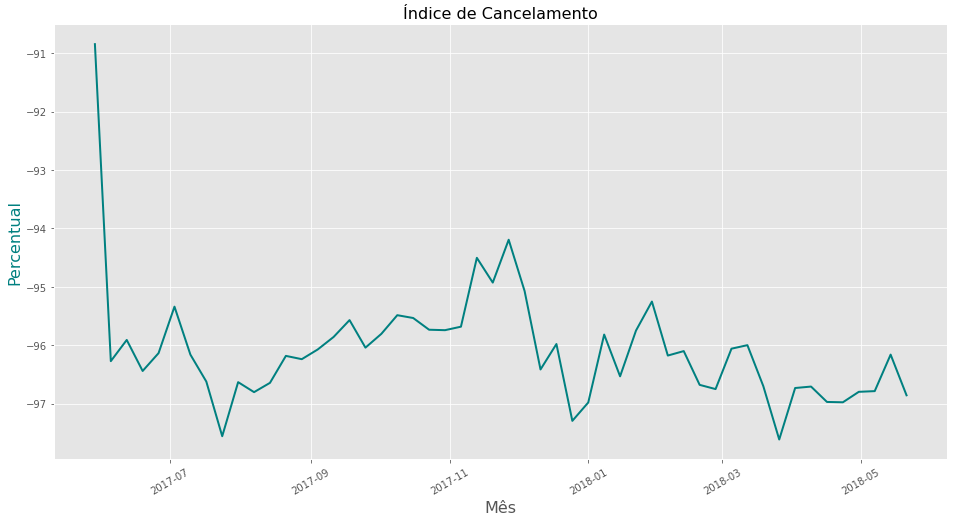

In [95]:
col1 = 'teal'
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=[16,8])
ax.plot(cohort_churn, color=col1, linewidth=2)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Percentual', color=col1, fontsize=16)
ax.set_title("Índice de Cancelamento",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.show()

Como já esperado, as tabelas e gráficos plotados tem o comportamento igual ao gráfico da taxa de retenção, com pontos de mínimos e máximos exatamente iguais.

Verificando a data da primeira compra dos usuários e  variação entre os meses

In [96]:
orders

,uid,revenue,buy_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00
...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00
50411,11369640365507475976,5.80,2018-05-31 23:50:00
50412,1786462140797698849,0.30,2018-05-31 23:54:00
50413,3993697860786194247,3.67,2018-05-31 23:56:00


In [97]:
#Agrupando a base de dados 'orders'
orders['orders_date'] = orders['buy_ts'].dt.date
orders['orders_week'] = orders['buy_ts'].dt.isocalendar().week
orders['orders_month'] = orders['buy_ts'].astype('datetime64[M]')

In [98]:
orders

,uid,revenue,buy_ts,orders_date,orders_week,orders_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01
...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31,22,2018-05-01
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31,22,2018-05-01
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31,22,2018-05-01
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31,22,2018-05-01


In [99]:
#Renomeando as colunas
orders_date = orders.rename(columns={'uid':'uid','revenue':'revenue','buy_ts':'buy_ts','orders_date':'date','orders_week':'orders_week','orders_month':'orders_month'})

In [100]:
orders_date

,uid,revenue,buy_ts,date,orders_week,orders_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01
...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31,22,2018-05-01
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31,22,2018-05-01
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31,22,2018-05-01
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31,22,2018-05-01


In [101]:
#Verificando as vendas mensais
orders_month = orders.groupby('orders_month').agg({'uid':'nunique','revenue':'sum'})

In [102]:
orders_month

,uid,revenue
orders_month,,
2017-06-01,2023,9557.49
2017-07-01,1984,12539.47
2017-08-01,1472,8758.78
2017-09-01,2750,18345.51
2017-10-01,4675,27987.70
2017-11-01,4547,27069.93
2017-12-01,4942,36388.60
2018-01-01,3898,19417.13
2018-02-01,4258,25560.54


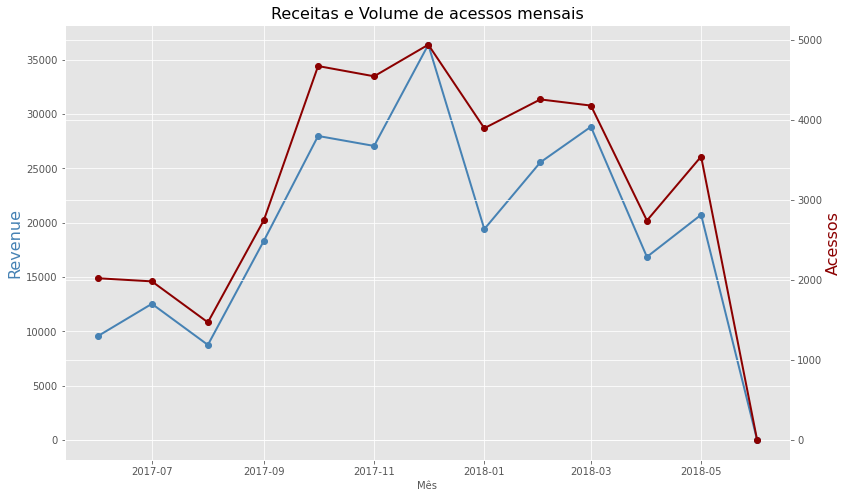

In [103]:
col1 = 'steelblue'
col2 = 'darkred'

fig,ax = plt.subplots(figsize=[13,8])

ax.plot(orders.groupby('orders_month').agg({'revenue':'sum'}), color=col1, marker='o', linewidth=2)
ax.set_xlabel('Mês', fontsize=10)
ax.set_ylabel('Revenue', color=col1, fontsize=16)

ax2 = ax.twinx()
ax2.plot(orders.groupby('orders_month').agg({'uid':'nunique'}), color=col2, marker='o', linewidth=2)
ax2.set_ylabel('Acessos', color=col2, fontsize=16)

ax.set_title("Receitas e Volume de acessos mensais",size=16)
plt.style.use("ggplot")
plt.show()

Pelo gráfico plotado acima entre quantidade de acessos e quantidade de vendas mensais ao longo do período, nota-se um comportamento proporcional entre as linhas, ou seja, quando há aumento dos acessos também há aumento das vendas. Interessante notar alguns períodos específicos onde esse comportamento não é seguido: no mês de junho/17 e fevereiro/18 percebe-se um aumento nos acessos e uma leve quedas nas vendas. um ponto interessante é no mês de dezembro onde todos os acessos foram convertidos em vendas, ou seja, é possivel dizer que todas os usuários que acessaram em dezembro fizeram pelo menos uma compra.

### Vendas mensais, origem das vendas e dispositivos

Será analisado agora as vendas mensais por origem de anúncio ('source_id') e disposito utilizado pelo usuário para acesso à plataforma ('device'). Será feito um agrupamento de algumas colunas entre as tabelas 'orders' e a tabela 'visits'.

In [104]:
#Criando um novo dataframe e organizando as colunas
visits_date = visits[['uid','source_id','device','visits_date']]
visits_date = visits_date.rename(columns = {'uid':'uid','source_id':'source_id','device':'device','visits_date':'date'})

In [105]:
visits_date.head(2)

,uid,source_id,device,date
0,16879256277535980062,4,touch,2017-12-20
1,104060357244891740,2,desktop,2018-02-19


In [106]:
visits_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        359400 non-null  uint64
 1   source_id  359400 non-null  int64 
 2   device     359400 non-null  object
 3   date       359400 non-null  object
dtypes: int64(1), object(2), uint64(1)
memory usage: 11.0+ MB


In [107]:
orders.head(2)

,uid,revenue,buy_ts,orders_date,orders_week,orders_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01


In [108]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           50415 non-null  uint64        
 1   revenue       50415 non-null  float64       
 2   buy_ts        50415 non-null  datetime64[ns]
 3   orders_date   50415 non-null  object        
 4   orders_week   50415 non-null  UInt32        
 5   orders_month  50415 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), float64(1), object(1), uint64(1)
memory usage: 2.2+ MB


In [109]:
#Adicionando a informação da coluna 'device' no conjunto de dados 'orders'
orders_device_old = pd.merge(orders_date, visits_date, on=['uid','date'], how="left").drop_duplicates().reset_index()
orders_device_old

,index,uid,revenue,buy_ts,date,orders_week,orders_month,source_id,device
0,0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01,1.0,desktop
1,1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01,2.0,desktop
2,2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01,2.0,desktop
3,3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01,2.0,desktop
4,4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01,3.0,desktop
...,...,...,...,...,...,...,...,...,...
56767,63678,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31,22,2018-05-01,4.0,touch
56768,63679,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31,22,2018-05-01,10.0,desktop
56769,63680,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31,22,2018-05-01,3.0,desktop
56770,63681,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31,22,2018-05-01,NaN,NaN


In [110]:
orders_device_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56772 entries, 0 to 56771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         56772 non-null  int64         
 1   uid           56772 non-null  uint64        
 2   revenue       56772 non-null  float64       
 3   buy_ts        56772 non-null  datetime64[ns]
 4   date          56772 non-null  object        
 5   orders_week   56772 non-null  UInt32        
 6   orders_month  56772 non-null  datetime64[ns]
 7   source_id     48117 non-null  float64       
 8   device        48117 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), float64(2), int64(1), object(2), uint64(1)
memory usage: 3.7+ MB


In [111]:
#Verificando os valores nulos
orders_device_old[orders_device_old['device'].isna()]

,index,uid,revenue,buy_ts,date,orders_week,orders_month,source_id,device
154,178,17648921517901779207,22.00,2017-06-02 12:40:00,2017-06-02,22,2017-06-01,NaN,NaN
196,225,3738863118490040629,2.69,2017-06-02 17:58:00,2017-06-02,22,2017-06-01,NaN,NaN
208,238,11601225246889834697,0.46,2017-06-02 19:18:00,2017-06-02,22,2017-06-01,NaN,NaN
242,275,11920452646463905188,3.67,2017-06-03 11:27:00,2017-06-03,22,2017-06-01,NaN,NaN
260,297,11920452646463905188,3.30,2017-06-03 14:18:00,2017-06-03,22,2017-06-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...
56757,63668,5877288373018804921,0.30,2018-05-31 23:14:00,2018-05-31,22,2018-05-01,NaN,NaN
56758,63669,656193162812616454,2.75,2018-05-31 23:29:00,2018-05-31,22,2018-05-01,NaN,NaN
56762,63673,13121453305610619664,1.16,2018-05-31 23:40:00,2018-05-31,22,2018-05-01,NaN,NaN
56770,63681,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31,22,2018-05-01,NaN,NaN


In [112]:
#verificando a consistência no conjunto de dados das tabelas por um exemplo
orders_date.loc[orders_date['uid'] == 3738863118490040629]

,uid,revenue,buy_ts,date,orders_week,orders_month
65,3738863118490040629,0.49,2017-06-01 21:02:00,2017-06-01,22,2017-06-01
176,3738863118490040629,2.69,2017-06-02 17:58:00,2017-06-02,22,2017-06-01
259,3738863118490040629,0.49,2017-06-03 20:03:00,2017-06-03,22,2017-06-01


In [113]:
#Inconsistência no conjunto de dados
visits_date.loc[visits_date['uid'] == 3738863118490040629]

,uid,source_id,device,date
68156,3738863118490040629,3,desktop,2017-06-01
189455,3738863118490040629,3,desktop,2017-06-03


Foi adotado o método 'merge how='left' para agregar à tabela 'orders'(50415 linhas) as informações 'device' e 'source_id'. No entanto, pelo verificado acima, a tabela 'orders_date' ficou com 56772 linhas e 8655 linhas com valores nulos. Pela verificação feita acima nota-se a inconsistência da tabela 'orders' pois para o mesmo 'uid' (3738863118490040629) há 3 registros na tabela 'orders' porém somente consta 2 registros na tabela 'visits' (impossível alguém fazer uma compra em uma plataforma sem que, para isso, tenha visitado o site para tal). Portanto, optou-se por outra abordagem: será adotado o método 'merge how=inner', para que se tenha certeza de há registro de uma compra do usuário bem como de sua visita à plataforma.

In [114]:
#Adicionando a informação da coluna 'device' no conjunto de dados 'orders'
orders_device = pd.merge(orders_date, visits_date, on=['uid','date'], how="inner").drop_duplicates().reset_index()
orders_device.head()

,index,uid,revenue,buy_ts,date,orders_week,orders_month,source_id,device
0,0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01,1,desktop
1,1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01,2,desktop
2,2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01,2,desktop
3,3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01,2,desktop
4,4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01,3,desktop


In [115]:
orders_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48117 entries, 0 to 48116
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         48117 non-null  int64         
 1   uid           48117 non-null  uint64        
 2   revenue       48117 non-null  float64       
 3   buy_ts        48117 non-null  datetime64[ns]
 4   date          48117 non-null  object        
 5   orders_week   48117 non-null  UInt32        
 6   orders_month  48117 non-null  datetime64[ns]
 7   source_id     48117 non-null  int64         
 8   device        48117 non-null  object        
dtypes: UInt32(1), datetime64[ns](2), float64(1), int64(2), object(2), uint64(1)
memory usage: 3.2+ MB


In [116]:
#verificando a consistência no conjunto de dados das tabelas por um exemplo
orders_date.loc[orders_date['uid'] == 14200605875248379450]

,uid,revenue,buy_ts,date,orders_week,orders_month
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01


In [117]:
#Inconsistência no conjunto de dados
visits_date.loc[visits_date['uid'] == 14200605875248379450]

,uid,source_id,device,date
263040,14200605875248379450,3,desktop,2017-06-01


Com isso, é possivel assegurar a consistência dos dados entre as tabelas 'orders' e 'visits', ou seja, há o registro da compra e também o registro da visita. Houve uma perda no volume de dados da tabela 'orders' em cerca de 5% (de 50400 linhas para 48100). Porém, devido baixa quantidade, não haverá um grande impacto na análise.

In [118]:
#Agrupando por 'devices'
orders_device.groupby(['orders_month', 'device']).agg({'uid': 'count'}).head()

uid
orders_month device       
2017-06-01   desktop  2039
             touch     354
2017-07-01   desktop  1890
             touch     444
2017-08-01   desktop  1455

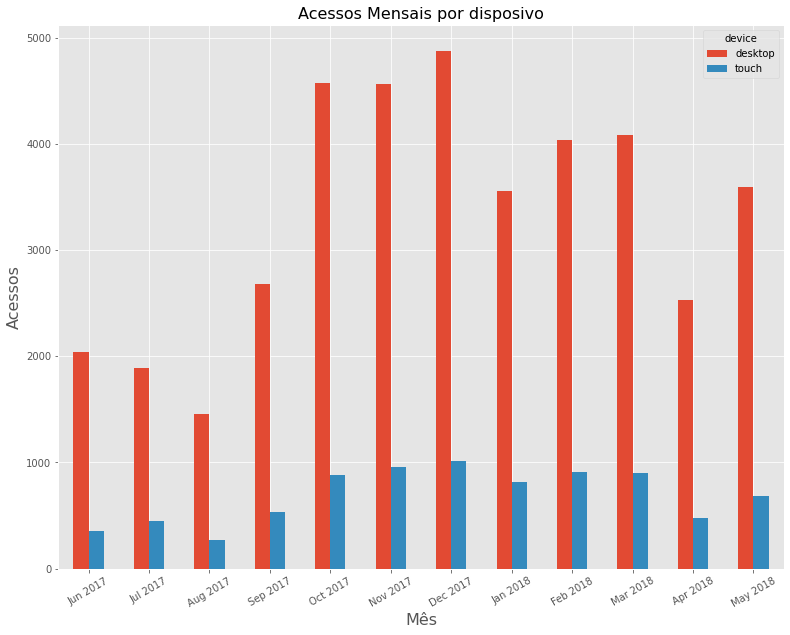

In [119]:
#Gráfico dos acessos pelos dispositivos
orders_device_plot = orders_device.pivot_table(index='orders_month', columns='device', values='uid', aggfunc='count')
orders_device_plot.index = [d.strftime("%b %Y") for d in orders_device_plot.index]
ax = orders_device_plot.plot.bar(figsize=[13,10])

ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Acessos', fontsize=16)
ax.set_title("Acessos Mensais por disposivo",size=16)
ax.xaxis.set_tick_params(rotation = 30)

sns.set_theme(style="whitegrid", palette="Accent")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
plt.show()

In [120]:
#Agrupando por 'uid' e 'source'
orders_device.groupby(['orders_month', 'source_id']).agg({'uid': 'count'}).head()

uid
orders_month source_id     
2017-06-01   1          332
             2          330
             3          649
             4          441
             5          479

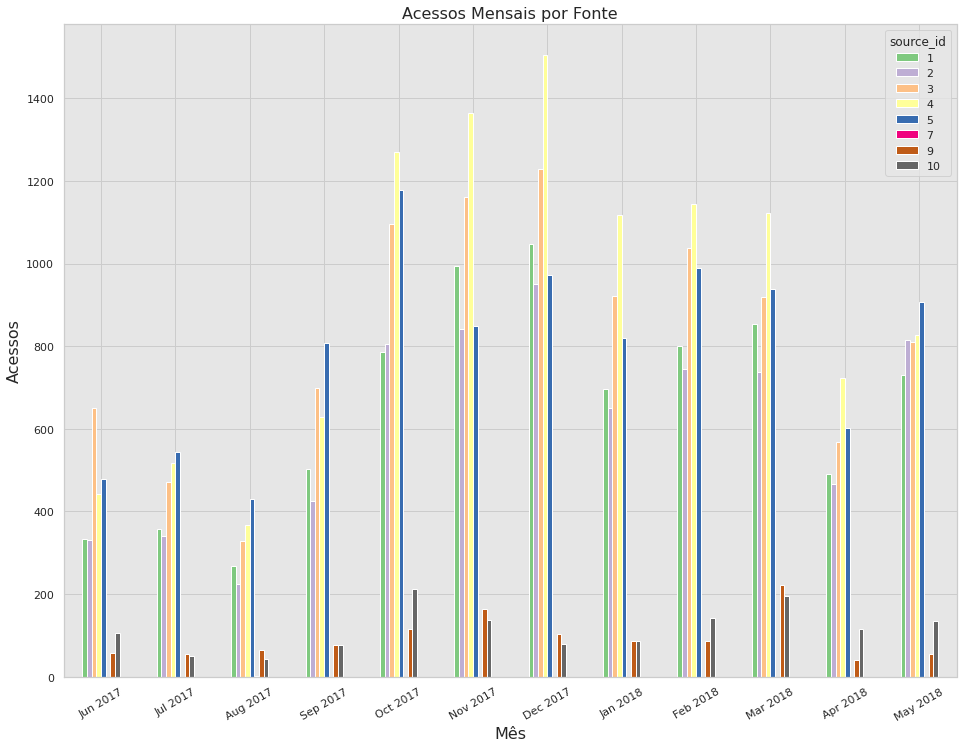

In [121]:
#Gráficos de Acessos por fontes
orders_device_plot = orders_device.pivot_table(index='orders_month', columns='source_id', values='uid', aggfunc='count')
orders_device_plot.index = [d.strftime("%b %Y") for d in orders_device_plot.index]
aw = orders_device_plot.plot.bar(figsize=[16,12])

#axis label
aw.set_xlabel('Mês', fontsize=16)
aw.set_ylabel('Acessos', fontsize=16)
aw.set_title("Acessos Mensais por Fonte",size=16)
aw.xaxis.set_tick_params(rotation = 30)

sns.set_theme(style="whitegrid", palette="viridis")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
plt.show()

Pelas tabelas e gráficos plotados é possivel verificar o comportamento dos usuários:

 - no gráfico Acessos Mensais por dispositivo, nota-se a preferência quase unânime dos usuários em acessar a plataforma por desktop. Nem mesmo no mês de dezembro, onde é identificado o maior volume de acessos e compras, quase 80% do total desse mês veio dos acessos por desktop.
 
 - já no gráfico Acessos Mensais por Fonte a Fonte 4 ficou acima das demais em 7 dos 12 meses verificados;
 - a Fonte 6 não aparece listada
 - nos meses de junho e julho há uma queda acentuada em todas as fontes, deixando-as próximas em acessos;
 - as Fontes 9 e 10 são as que possuem a menor quantidade de acessos em todo o período
 
É necessário uma melhor investigação dos motivos pelos quais os usuários estão optando mais pelo acesso via desktop, se são problemas no aplicativo móvel, problemas no site (site está adaptado para telas pequenas, meio de pagamento funcionando, etc), pois o acesso por aplicativos móveis não estão performando de forma adequada.

In [122]:
#Agrupando pela data de compra
orders_data = orders.groupby('uid').agg({'orders_date': 'min'}).reset_index()
orders_data.columns = ['uid', 'orders_date']

In [123]:
orders_data

,uid,orders_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [124]:
#Agrupando pela primeira compra
first_orders = orders.groupby('uid').agg({'orders_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_orders_month']

In [125]:
first_orders

,uid,first_orders_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [126]:
#Agrupando os usuários por compras únicas mensais
first_orders_1 = first_orders
first_orders_1 = first_orders_1.groupby('first_orders_month').agg({'uid': 'nunique'}).reset_index()
first_orders_1.columns = ['orders_month', 'uid']

In [127]:
first_orders_1

,orders_month,uid
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [128]:
#Agrupando os usuários por compras totais mensais
orders_total_1 = orders.groupby('orders_month').agg({'uid': 'count'}).reset_index()

In [129]:
orders_total_1

,orders_month,uid
0,2017-06-01,2354
1,2017-07-01,2363
2,2017-08-01,1807
3,2017-09-01,3387
4,2017-10-01,5679
5,2017-11-01,5659
6,2017-12-01,6218
7,2018-01-01,4721
8,2018-02-01,5281
9,2018-03-01,5326


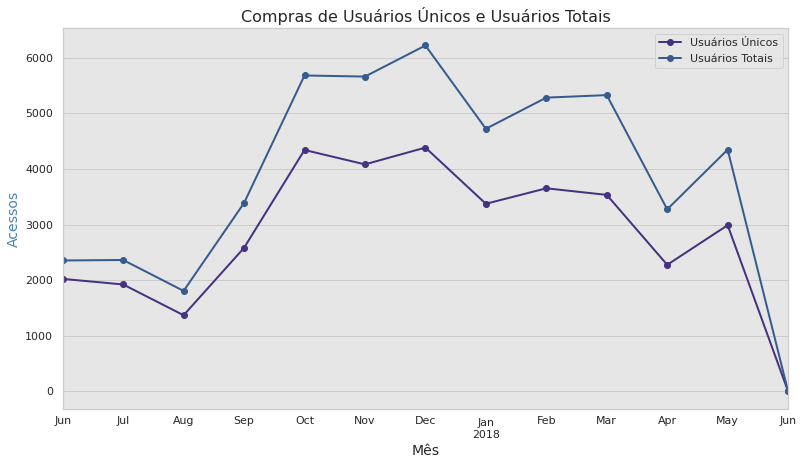

In [130]:
#Gráfico de compras de usuários únicos e total
col1 = 'steelblue'
col2 = 'darkred'

ax = first_orders_1.plot(x='orders_month', y='uid', marker='o', linewidth=2, label='Usuários Únicos',figsize=(13, 7))
orders_total_1.plot(ax=ax, x='orders_month', y='uid', marker='o', linewidth=2, label='Usuários Totais')
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Acessos', color=col1, fontsize=14)

ax.set_title("Compras de Usuários Únicos e Usuários Totais",size=16)
plt.grid(axis="x")
plt.legend()
plt.style.use("ggplot")
plt.show()

Analisando as tabelas e gráfico plotado acima, verifica-se o comportamento dos usuários em relação ao período. Os usuários únicos(aqueles que fizeram uma única compra) está abaixo da linha azul (todas as compras dos usuários), demostrando que parte dos acessos provém de antigos cliente que fazem mais de uma compra no mês. Significa também que o produto/serviço está com dificuldades de atrair novos clientes.

In [131]:
#Verificando a primeira compra de cada usuário de acordo com o acesso
#(quanto tempo leva, em média, para um cliente fazer sua primeira compra após seu primeiro acesso)
acess_first_orders = pd.merge(first_access,orders_data, on='uid')
acess_first_orders['visits_date'] = pd.to_datetime(acess_first_orders['visits_date'])
acess_first_orders['orders_date'] = pd.to_datetime(acess_first_orders['orders_date'])
acess_first_orders['days'] =(acess_first_orders['orders_date'] - acess_first_orders['visits_date']) / np.timedelta64(1, 'D')
acess_first_orders['days'] = acess_first_orders['days'].round().astype('int')
acess_first_orders.head()

,uid,visits_date,orders_date,days
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0


In [132]:
#Calulando a média de dias entre a data do primeiro acesso e a data da primeira compra
acess_first_orders["days"].mean()

16.895901212934316

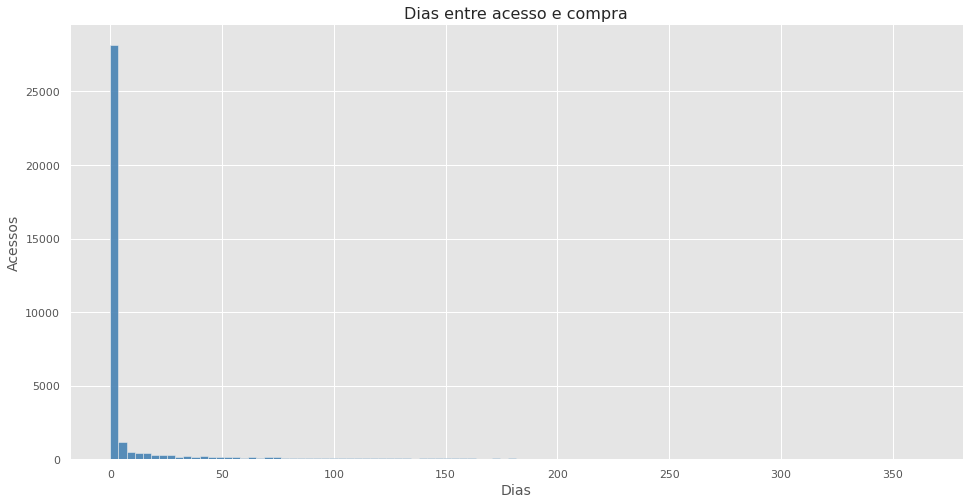

In [133]:
fig,ax = plt.subplots(figsize=[16,8])
sns.histplot(ax=ax,data=acess_first_orders,x='days', bins=100,color='steelblue', alpha=0.9)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('Acessos', fontsize=14)
ax.set_title("Dias entre acesso e compra",size=16)
plt.show()

Em média um novo usuário demora 16 dias entre o seu primeiro acesso à plataforma e sua primeira compra.

In [134]:
#Agrupando a primeira compra com a tabela 'orders'
orders = pd.merge(orders,first_orders, on='uid')

## Construção e Análise das Cohorts

### Cohort de LTV e CAC

In [135]:
#Ordenando pela primeira compra (já feito acima)
first_orders

,uid,first_orders_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [136]:
#Quantidade de orders feitas por mês
cohort_month_orders = orders_total_1
cohort_month_orders.columns = ['first_orders_month', 'n_buys']
cohort_month_orders.head(2)

,first_orders_month,n_buys
0,2017-06-01,2354
1,2017-07-01,2363


In [137]:
#Conjunto de dados ja com a coluna 'first_orders_month' 
orders.head()

,uid,revenue,buy_ts,orders_date,orders_week,orders_month,first_orders_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01,2017-06-01


In [138]:
#Agrupando e somando os pedidos da primeira compra e mês de compra
cohorts_orders = orders.groupby(['first_orders_month','orders_month']).agg({'revenue': 'sum'}).reset_index()

In [139]:
cohorts_orders.head(2)

,first_orders_month,orders_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82


In [140]:
#Acrescentando os dados das primeiras compras dos usuários
report = pd.merge(cohort_month_orders, cohorts_orders, on='first_orders_month')

In [141]:
report.head()

,first_orders_month,n_buys,orders_month,revenue
0,2017-06-01,2354,2017-06-01,9557.49
1,2017-06-01,2354,2017-07-01,981.82
2,2017-06-01,2354,2017-08-01,885.34
3,2017-06-01,2354,2017-09-01,1931.30
4,2017-06-01,2354,2017-10-01,2068.58


In [142]:
#Calculando Gross Profit (gp) - adotando como margem de lucro-50%
margin_rate = 0.5
report['gp'] =  report['revenue'] * margin_rate

In [143]:
report.head()

,first_orders_month,n_buys,orders_month,revenue,gp
0,2017-06-01,2354,2017-06-01,9557.49,4778.745
1,2017-06-01,2354,2017-07-01,981.82,490.910
2,2017-06-01,2354,2017-08-01,885.34,442.670
3,2017-06-01,2354,2017-09-01,1931.30,965.650
4,2017-06-01,2354,2017-10-01,2068.58,1034.290


In [144]:
#Calculando a idade da Cohort
report['age'] =(report['orders_month'] - report['first_orders_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [145]:
report.head()

,first_orders_month,n_buys,orders_month,revenue,gp,age
0,2017-06-01,2354,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2354,2017-07-01,981.82,490.910,1
2,2017-06-01,2354,2017-08-01,885.34,442.670,2
3,2017-06-01,2354,2017-09-01,1931.30,965.650,3
4,2017-06-01,2354,2017-10-01,2068.58,1034.290,4


In [146]:
#Calculando o LTV (Lifetime Value)
report['ltv'] = report['revenue'] / report['n_buys']

In [147]:
report

,first_orders_month,n_buys,orders_month,revenue,gp,age,ltv
0,2017-06-01,2354,2017-06-01,9557.49,4778.745,0,4.060106
1,2017-06-01,2354,2017-07-01,981.82,490.910,1,0.417086
2,2017-06-01,2354,2017-08-01,885.34,442.670,2,0.376100
3,2017-06-01,2354,2017-09-01,1931.30,965.650,3,0.820433
4,2017-06-01,2354,2017-10-01,2068.58,1034.290,4,0.878751
...,...,...,...,...,...,...,...
74,2018-03-01,5326,2018-05-01,1114.87,557.435,2,0.209326
75,2018-04-01,3273,2018-04-01,10600.69,5300.345,0,3.238830
76,2018-04-01,3273,2018-05-01,1209.92,604.960,1,0.369667
77,2018-05-01,4346,2018-05-01,13925.76,6962.880,0,3.204271


In [148]:
report.head()

,first_orders_month,n_buys,orders_month,revenue,gp,age,ltv
0,2017-06-01,2354,2017-06-01,9557.49,4778.745,0,4.060106
1,2017-06-01,2354,2017-07-01,981.82,490.910,1,0.417086
2,2017-06-01,2354,2017-08-01,885.34,442.670,2,0.376100
3,2017-06-01,2354,2017-09-01,1931.30,965.650,3,0.820433
4,2017-06-01,2354,2017-10-01,2068.58,1034.290,4,0.878751


In [149]:
#Agrupando pelos valores de 'ltv' 
report_result = report.pivot_table(index='first_orders_month', columns='age', values='ltv',aggfunc='mean').round(3)
report_result_ = report_result.fillna('')

In [150]:
report_result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,4.060,0.417,0.376,0.820,0.879,0.632,0.817,0.500,0.475,0.521,0.491,0.221
2017-07-01,4.891,0.273,0.507,0.292,0.144,0.127,0.098,0.115,0.131,0.120,0.127,NaN
2017-08-01,4.000,0.358,0.348,0.297,0.375,0.215,0.160,0.307,0.222,0.143,NaN,NaN
2017-09-01,4.301,0.852,0.397,3.030,0.305,0.493,0.535,0.185,0.140,NaN,NaN,NaN
2017-10-01,3.824,0.409,0.146,0.120,0.116,0.092,0.065,0.088,NaN,NaN,NaN,NaN
2017-11-01,3.717,0.288,0.144,0.234,0.107,0.039,0.083,NaN,NaN,NaN,NaN,NaN
2017-12-01,3.340,0.184,0.652,0.751,0.221,0.238,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.955,0.211,0.217,0.102,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.874,0.192,0.054,0.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
report_result.describe()

age,0,1,2,3,4,5,6,7,8,9,10,11
count,13.000000,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000
mean,3.618077,0.341273,0.305000,0.633000,0.274000,0.262286,0.293000,0.239000,0.242000,0.261333,0.309000,0.221
std,0.582497,0.190713,0.184911,0.939863,0.267846,0.219810,0.311428,0.168699,0.160638,0.225172,0.257387,NaN
min,2.874000,0.184000,0.054000,0.051000,0.045000,0.039000,0.065000,0.088000,0.131000,0.120000,0.127000,0.221
25%,3.210000,0.205500,0.161750,0.120000,0.113750,0.109500,0.086750,0.115000,0.137750,0.131500,0.218000,0.221
50%,3.420000,0.288000,0.282500,0.292000,0.182500,0.215000,0.129000,0.185000,0.181000,0.143000,0.309000,0.221
75%,4.000000,0.389500,0.391750,0.751000,0.322500,0.365500,0.441250,0.307000,0.285250,0.332000,0.400000,0.221
max,4.891000,0.852000,0.652000,3.030000,0.879000,0.632000,0.817000,0.500000,0.475000,0.521000,0.491000,0.221


In [152]:
#O valor da Primeira cohort (mais completa)
ltv_201706 = report_result.loc['2017-06-01'].sum()
ltv_201706

10.209

Em média cada usuário gerou uma receita de 10.2

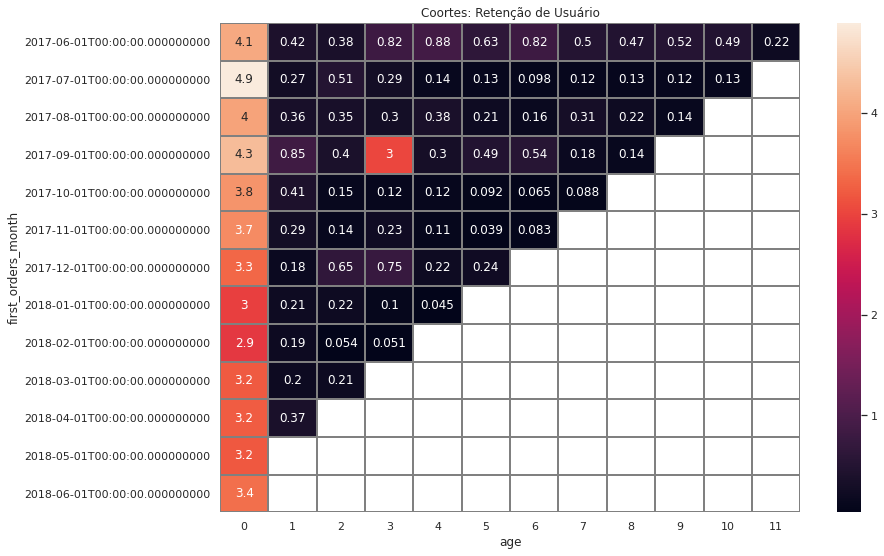

In [153]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Coortes: Retenção de Usuário')
sns.heatmap(report_result, linewidths=1, annot=True ,linecolor='gray')
plt.show()

Conforme tabelas e heatmap gerados acima, nota-se o comportamento de quanto os usuários gastaram na plataforma no período. Percebe-se um utlier no mês 9 que necessita de verificação.

### Cohort do Volume médio de compras

Agora será analisado como a receita média de compras por usuário varia ao longo do tempo. Isso é uma métrica importante pois auxilia a entender o quanto a receita média está variando no período.

In [154]:
orders

,uid,revenue,buy_ts,orders_date,orders_week,orders_month,first_orders_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,22,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,22,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,22,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,22,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,22,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31,22,2018-05-01,2018-05-01
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31,22,2018-05-01,2018-05-01
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31,22,2018-05-01,2018-05-01
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2018-05-31,22,2018-05-01,2018-05-01


In [155]:
#agrupando por mês de compra e primeira compra somando as receitas
orders_grouped_by_cohorts = orders.groupby(['first_orders_month', 'orders_month']).agg({'revenue': 'sum', 'uid': 'nunique'})

In [156]:
orders_grouped_by_cohorts

revenue   uid
first_orders_month orders_month                
2017-06-01         2017-06-01     9557.49  2023
                   2017-07-01      981.82    61
                   2017-08-01      885.34    50
                   2017-09-01     1931.30    54
                   2017-10-01     2068.58    88
...                                   ...   ...
2018-03-01         2018-05-01     1114.87    58
2018-04-01         2018-04-01    10600.69  2276
                   2018-05-01     1209.92    69
2018-05-01         2018-05-01    13925.76  2988
2018-06-01         2018-06-01        3.42     1

[79 rows x 2 columns]

In [157]:
#Calculando a receita por usuário
orders_grouped_by_cohorts['revenue_per_user'] = (orders_grouped_by_cohorts['revenue']/ orders_grouped_by_cohorts['uid'])

In [158]:
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_orders_month orders_month                                  
2017-06-01         2017-06-01     9557.49  2023          4.724414
                   2017-07-01      981.82    61         16.095410
                   2017-08-01      885.34    50         17.706800
                   2017-09-01     1931.30    54         35.764815
                   2017-10-01     2068.58    88         23.506591
...                                   ...   ...               ...
2018-03-01         2018-05-01     1114.87    58         19.221897
2018-04-01         2018-04-01    10600.69  2276          4.657597
                   2018-05-01     1209.92    69         17.535072
2018-05-01         2018-05-01    13925.76  2988          4.660562
2018-06-01         2018-06-01        3.42     1          3.420000

[79 rows x 3 columns]

In [159]:
#Criando uma pivot table da média de receita por usuário
orders_grouped_by_cohorts.pivot_table(index='first_orders_month',columns='orders_month',values='revenue_per_user',aggfunc='mean')

orders_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_orders_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [160]:
#Criando as cohorts dos meses
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['orders_month']- orders_grouped_by_cohorts['first_orders_month'])
orders_grouped_by_cohorts['cohort_lifetime'].head() 

0     0 days
1    30 days
2    61 days
3    92 days
4   122 days
Name: cohort_lifetime, dtype: timedelta64[ns]

In [161]:
#Ajustando os valores das cohorts para os meses
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1, 'M')
orders_grouped_by_cohorts['cohort_lifetime'] = (orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))
orders_grouped_by_cohorts.head()

,first_orders_month,orders_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


In [162]:
#Convertendo a coluna 'first_orders_month' para o formato necessário
orders_grouped_by_cohorts['first_orders_month'].dt.strftime('%d.%m.%Y')
orders_grouped_by_cohorts['first_orders_month'] = orders_grouped_by_cohorts['first_orders_month'].dt.strftime('%Y-%m') 

In [163]:
orders_grouped_by_cohorts

,first_orders_month,orders_month,revenue,uid,revenue_per_user,cohort_lifetime
0,2017-06,2017-06-01,9557.49,2023,4.724414,0
1,2017-06,2017-07-01,981.82,61,16.095410,1
2,2017-06,2017-08-01,885.34,50,17.706800,2
3,2017-06,2017-09-01,1931.30,54,35.764815,3
4,2017-06,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03,2018-05-01,1114.87,58,19.221897,2
75,2018-04,2018-04-01,10600.69,2276,4.657597,0
76,2018-04,2018-05-01,1209.92,69,17.535072,1
77,2018-05,2018-05-01,13925.76,2988,4.660562,0


In [164]:
#Gerando uma pivot table da receita
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(index='first_orders_month',columns='cohort_lifetime',values='revenue_per_user',aggfunc='mean')

In [165]:
revenue_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
revenue_per_user_pivot.describe()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
count,13.000000,11.000000,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
mean,4.801682,12.268178,15.347499,31.511412,14.238572,14.813293,14.771426,13.815504,14.698121,16.134264,18.597590,9.804151
std,0.669714,4.618596,10.055266,42.629766,8.788058,8.893367,11.310005,7.481250,6.547515,9.878327,10.017926,NaN
min,3.420000,7.339054,4.942414,6.941026,4.699556,4.580833,6.421111,6.992821,7.382143,8.307419,11.513846,9.804151
25%,4.657597,8.665614,8.052768,10.786094,7.039138,7.575990,6.821120,7.479701,10.129024,10.584619,15.055718,9.804151
50%,4.738191,11.287427,12.905371,12.182955,12.189267,12.139063,8.592586,12.610455,15.170170,12.861818,18.597590,9.804151
75%,5.154683,14.245878,18.843122,35.764815,20.787802,22.863087,22.982924,16.961351,19.739267,20.047687,22.139462,9.804151
max,6.010218,22.188385,39.366019,138.669189,27.431400,26.095000,31.011935,25.033191,21.070000,27.233556,25.681333,9.804151


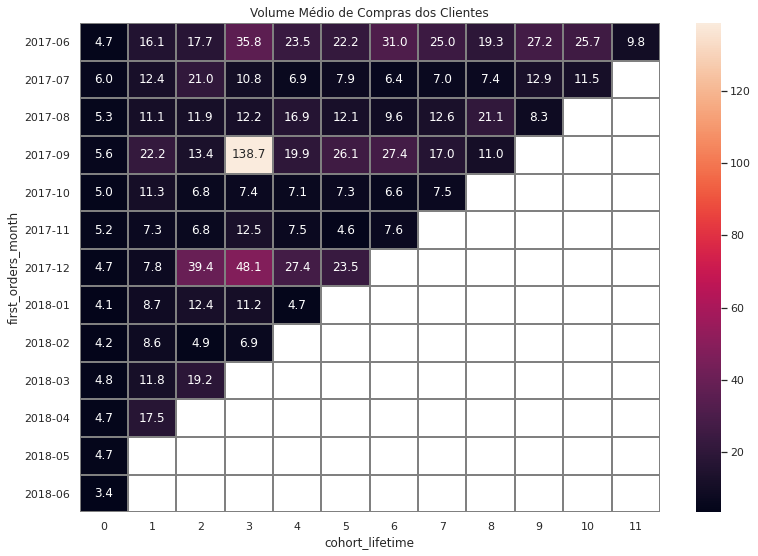

In [167]:
plt.figure(figsize=(13, 9))
plt.title('Volume Médio de Compras dos Clientes')
sns.heatmap(revenue_per_user_pivot,annot=True,fmt='.1f',linewidths=1,linecolor='gray')
plt.show()

Analisando as tabelas e heatmap plotados acima, percebe-se que o mês 06-2017 se destaca das demais cohorts om valores acima das demais. Outros destaques são as datas de 09-2017 que apresenta um valor bem atípico (já verificado na análise anterior) e a data de 12-2017 onde apresenta as duas primeiras cohorts com valores mais altos que as demais. 

### Marketing

In [168]:
#Criando uma nova coluna no conjunto de dados
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,costs,dt,costs_month
0,1,75.20,2017-06-01,2017-06-01
1,1,62.25,2017-06-02,2017-06-01
2,1,36.53,2017-06-03,2017-06-01
3,1,55.00,2017-06-04,2017-06-01
4,1,57.08,2017-06-05,2017-06-01
...,...,...,...,...
2537,10,9.92,2018-05-27,2018-05-01
2538,10,21.26,2018-05-28,2018-05-01
2539,10,11.32,2018-05-29,2018-05-01
2540,10,33.15,2018-05-30,2018-05-01


In [169]:
#Conseguindo a coorte necessária
cohort_201706 = report[report['first_orders_month'] == '2017-06-01']

In [170]:
cohort_201706

,first_orders_month,n_buys,orders_month,revenue,gp,age,ltv
0,2017-06-01,2354,2017-06-01,9557.49,4778.745,0,4.060106
1,2017-06-01,2354,2017-07-01,981.82,490.910,1,0.417086
2,2017-06-01,2354,2017-08-01,885.34,442.670,2,0.376100
3,2017-06-01,2354,2017-09-01,1931.30,965.650,3,0.820433
4,2017-06-01,2354,2017-10-01,2068.58,1034.290,4,0.878751
5,2017-06-01,2354,2017-11-01,1487.92,743.960,5,0.632082
6,2017-06-01,2354,2017-12-01,1922.74,961.370,6,0.816797
7,2017-06-01,2354,2018-01-01,1176.56,588.280,7,0.499813
8,2017-06-01,2354,2018-02-01,1119.15,559.575,8,0.475425
9,2017-06-01,2354,2018-03-01,1225.51,612.755,9,0.520607


In [171]:
# calculando custos para o mês da cohort estipulado
costs_201706 = costs[costs['costs_month'] == '2017-06-01']['costs'].sum()

In [172]:
#Custo total do período
costs_201706

18015.0

In [173]:
#Calculando o CAC para o mês da cohort estipulado
n_buyers_201706 = cohort_201706['n_buys'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = report_result.loc['2017-06-01'].sum()

In [174]:
cac_201706

7.652931180968564

Cada cliente custou cerca de 7.65 em investimentos em marketing.

In [175]:
# calculando as despesas total mensais
monthly_costs_total = costs.groupby('costs_month')['costs'].sum()

In [176]:
monthly_costs_total.head(20)

costs_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

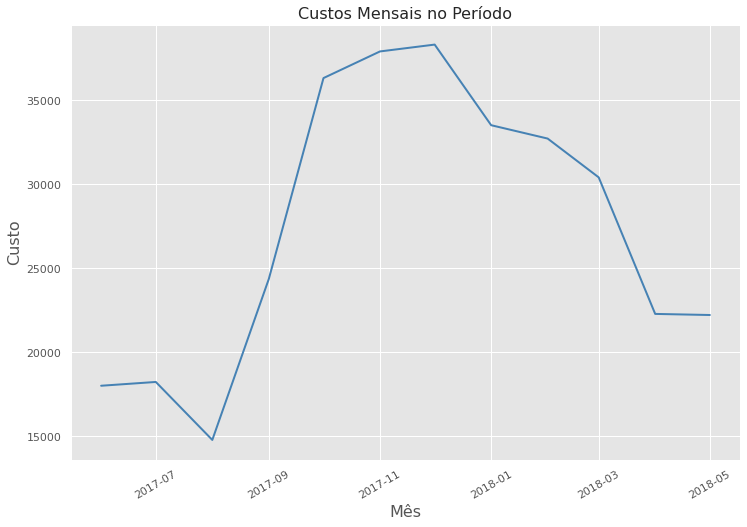

In [177]:
col1 = 'steelblue'
plt.style.use("ggplot")

fig,ax = plt.subplots(figsize=[12,8])
ax.plot(monthly_costs_total, color=col1, linewidth=2)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
ax.set_title("Custos Mensais no Período",size=16)
ax.xaxis.set_tick_params(rotation = 30)

plt.show()

Ananlisando o gráfico dos Custos Mensais com Marketing ao longo do período, percebe-se um certo desequilíbrio e descasamento em relação aos acessos e compras mensais realizados pelos usuários.

In [178]:
#Agrupando por fontes
orders_device.groupby(['orders_month', 'source_id']).agg({'uid': 'count'}).head()

uid
orders_month source_id     
2017-06-01   1          332
             2          330
             3          649
             4          441
             5          479

In [179]:
# calculando as despesas mensais por origem
monthly_costs_source = costs.groupby(['source_id']).sum()
monthly_costs_source.head() 

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10


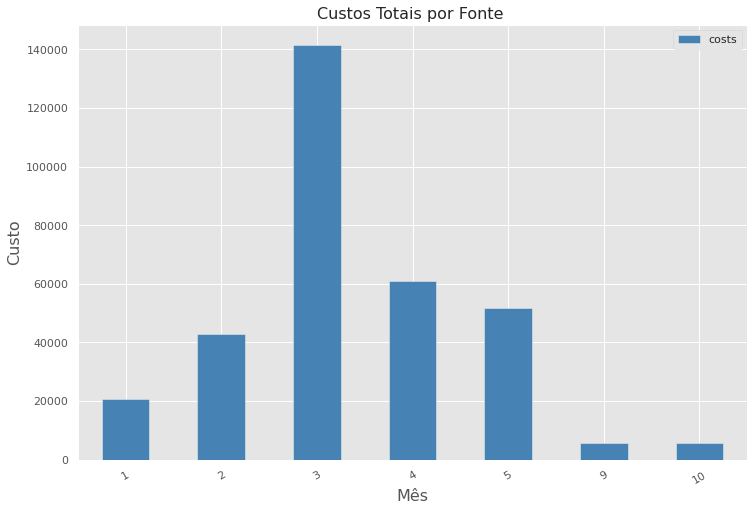

In [180]:
#Gráfico de Custos das Fontes
col1 = 'steelblue'
ax = monthly_costs_source.plot.bar(figsize=[12,8], color=col1)
ax.set_xlabel('Mês', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
ax.set_title("Custos Totais por Fonte ",size=16)
ax.xaxis.set_tick_params(rotation = 30)
plt.style.use("ggplot")

Pelo gráfico acima, nota-se a a distribuição dos custos por cada fonte no período JUN/17 a MAI/18. Percebe-se a fonte 3 foi responsável por cerca de 43% de todo custo total. Em segundo e terceiro ficaram as fonte 4 e 5, com cerca de 18,5% e 15,7% respectivamente. Já as fontes 9 e 10 são as que menos receberam investimentos com cerca de 1% cada em relação ao valor total do período. As fontes 6, 7 e 8 não receberam investimentos. 

In [181]:
#Calculando o ROMI
report_total = pd.merge(report, monthly_costs_total, left_on='first_orders_month', right_on='costs_month')
report_total['cac'] =  report_total['costs'] / report_total['n_buys']
report_total['romi'] =report_total['ltv'] / report_total['cac']
output = report_total.pivot_table(index='first_orders_month', columns='age', values='romi', aggfunc='mean')

In [182]:
output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,0.530530,0.054500,0.049145,0.107205,0.114825,0.082593,0.106730,0.065310,0.062123,0.068027,0.064150,0.028844
2017-07-01,0.633623,0.035339,0.065735,0.037845,0.018638,0.016451,0.012673,0.014951,0.016998,0.015513,0.016412,NaN
2017-08-01,0.488747,0.043719,0.042468,0.036243,0.045762,0.026263,0.019513,0.037515,0.027067,0.017412,NaN,NaN
2017-09-01,0.597833,0.118368,0.055174,0.421091,0.042425,0.068533,0.074310,0.025753,0.019489,NaN,NaN,NaN
2017-10-01,0.597866,0.064015,0.022869,0.018776,0.018109,0.014381,0.010134,0.013797,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.042980,0.021483,0.034983,0.015934,0.005800,0.012373,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.029785,0.105824,0.121860,0.035797,0.038670,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.029662,0.030620,0.014368,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.031048,0.008760,0.008272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
#Arredondando os valores
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_orders_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [184]:
#Fazendo uma soma acumulada
output.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

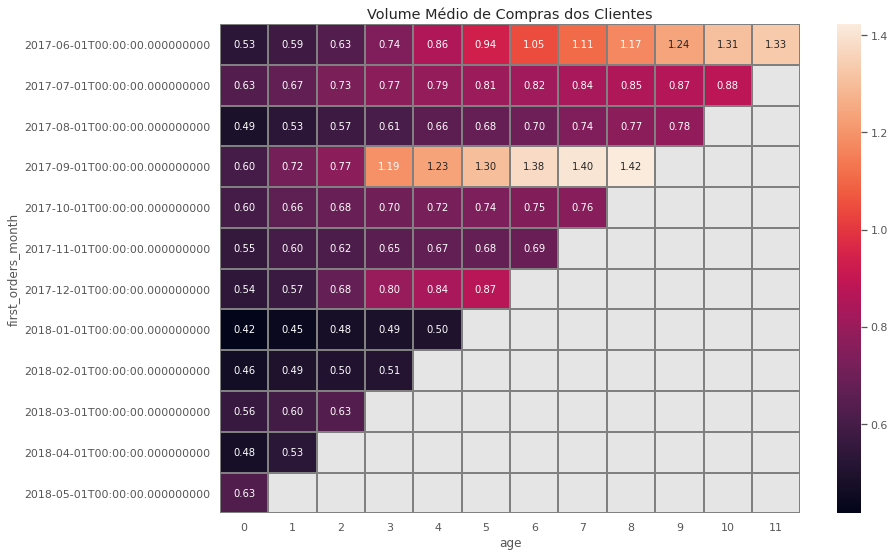

In [185]:
plt.figure(figsize=(13, 9))
plt.title('Volume Médio de Compras dos Clientes')
sns.heatmap(output.cumsum(axis=1),annot=True,fmt='.2f',linewidths=1,linecolor='gray')
plt.show()

A cohort do mês 06-2017 demonstra que os investimentos em marketing foram pagos a partir do 6º mês. A cohort do mês 09-2017 continua se destacando com seus valores atípicos. Em média, as cohorts pagam seus investimentos entre 7 e 8 meses.

## Conclusão

O propósito da análise é ajuda a empresa a otimizar suas despesas com o marketing, verificando as fontes de visitas e dispositivos mais adequados ao produt/público pretendido.

No capitulo 1 foi carregado as bases de dados e bibliotecas que seriam utilizadas na análise.

No capítulo 2 foi verificado nos conjuntos de dados:
  - os valores ausentes e duplicados
  - alteração nos nomes das colunas
  - correção do tipo de dado (principalmente datetime das bases de dados)
  - renomeação e reorganização das colunas em todas as bases
  
A análise dos conjuntos de dados se dá no capítulo 3, começand pelo conjunto de dados 'visits'cujo objetivo é verificar a popularidade e sucesso da plataforma, sendo  necessário avaliar as atividades diária, dia da semana e mensal dos usuários. Para isso, há três métricas principais que descrevem esse comportamento:
 - DAU - número de usuários univocos ativos diário
 - WAU - número de usuários unívocos ativos por dia da semana
 - MAU - número de usuários nívocos ativos mensal
 
Foram plotados os respectivos gráficos de cada métrica levantada, sendo possivel verificar a sazonalidade do produto/serviço oferecido ao longo do período.

Também foi calculado as sessões dos usuários no período, ou seja, quantos acessos únicos a plataforma teve no período. Para isso, fi feito um filtro dos usuários únicos (pois o mesmo usuário pode acessar a plataforma diversas vezes), chegando ao valor de 1,16 (pouco mais de 1 acesso/usuário). Foi calculado a duração das sessões dos usuários, chegando a um valor médio de 1 minuto. Isso mostra que a interação com a plataforma é baixa, principalmente quando se trata de novos usuários, que não conhecem a plataforma.

Foi calculado a data da primeira venda no conjunto de dados 'orders', bem como plotado um gráfico de Receitas e volume de acessos mensais afim de verificar a relação entre acessos e receita, onde verificou-se a simetria entre os gráficos, ou seja, quando há aumento dos acessos também há aumento das vendas. Interessante notar alguns períodos específicos onde esse comportamento não é seguido: no mês de junho/17 e fevereiro/18 percebe-se um aumento nos acessos e uma leve quedas nas vendas.Um ponto interessante é no mês de dezembro onde todos os acessos foram convertidos em vendas. 

Também foi verificado a taxa de retenção e índice de cancelamento dos usuários na plataforma onde percebe-se o comportamento dos usuários na plataforma ao longo do período. Os pontos mais críticos que demandam atenção são os meses de agosto, dezembro e março, onde a curva atinge seus valores mínimos. Já o melhor período de retenção dos usuários é no mês de novembro. Para todo o período tem-se uma taxa de retenção média de 3,92% e índice de cancelamento de 96,08%

O objetivo no tópico "Vendas mensais, origem das vendas e dispositivos" foi a análise das vendas mensais por origem de anúncio ('sorce_id') e quais dispositivos eram mais utilizados pelos usuários para acesso à plataforma.Conforme descrito no tópico em qestão, foi constatado inconsistência no onjunto de dados 'orders' (haviam registros na mesma que não constavam do conjunto de dados 'visits', ou seja, impossivel um usuário realizar uma compra sem acessar a plataforma). Diante da inconsistência, adotou-se outro método (how='inner')para garantir que as informações estivessem em ambos os conjuntos de dados. Com isso, houve uma perda de 5% n volume de dados do conjunto 'orders', não havendo grande impacto na análise.

Com o conjunto de dados consistente, foi plotado o gráfico "Acessos Mensais por Dispositivo" e "Acessos Mensais por Fonte", onde temos algumas observações:

- no gráfico Acessos Mensais por dispositivo, nota-se a preferência quase unânime dos usuários em acessar a plataforma por desktop. Nem mesmo no mês de dezembro, onde é identificado o maior volume de acessos e compras, quase 80% do total desse mês veio dos acessos por desktop.
 
- já no gráfico Acessos Mensais por Fonte a Fonte 4 ficou acima das demais em 7 dos 12 meses verificados; a Fonte 6 não aparece listada; nos meses de junho e julho há uma queda acentuada em todas as fontes, deixando-as próximas em acessos; as Fontes 9 e 10 são as que possuem a menor quantidade de acessos em todo o período.

Pelas análise e observações acima, faz-se necessário uma melhor investigação dos motivos pelos quais os usuários estão optando por acessos via desktop. Com relaçao às Fontes, uma análise em relação a viabilidade de algumas delas seria propício, pois percebe-se uma baixa performance de algumas.

Um fato interessante durante a análise foi verificar a relação entre as compras de usuários únicos e as compras totais. Foi plotado o gráfico "Compras de Usuários Únicos e Usuários Totais". Os usuários únicos(aqueles que fizeram uma única compra) está abaixo da linha azul (todas as compras dos usuários), demostrando que parte dos acessos provém de antigos cliente que fazem mais de uma compra no mês. Significa também que o produto/serviço está com dificuldades de atrair novos clientes. Também foi calculado que um novo usuário demora, em média 16 dias para realizar sua primeira compra desde o seu primeiro acesso à plataforma.

Na "Construção e Análise das Cohorts" foram feitos agrupamentos e filtros nas tabelas, calculado o GP, inserido a idade das cohorts, agrupado e calculado o LTV (Lifetime Value). Isso feito adotando como margin_rate o valor de 50%. Como a primeira cohort do gráfico é a mais completa, a mesma foi selecionada como referência e calculada a soma do período, chegando no valor de 10.20, ou seja, esse é o valor médio que um cliente gerou de receita. Tabém foi calculado volume médio das vendas, onde analisando as tabelas e heatmap plotados acima, percebe-se que o mês 06-2017 se destaca das demais cohorts om valores acima das demais. Outros destaques são as datas de 09-2017 que apresenta um valor bem atípico (já verificado na análise anterior) e a data de 12-2017 onde apresenta as duas primeiras cohorts com valores mais altos que as demais. Necessário destacar aqui que, como não se sabe detalhes da plataforma/serviço tampouco do público-alvo, uma análise mais aprofundada das causas dos comportamentos demonstrados nos gráficos fica impossibilitada.

No cálculo do CAC (Customer Acqusition Cost - custo de aquisição de cliente), após filtros e agrupamentos nas tabelas, foi calculado o CAC tomando como referência a mesma cohort do LTV, obtendo um valor de 7.65, ou seja, é o custo médio de cada cliente em marketing. O custo total no período foi de 18.015 por usuário.

Foram agrupados os custos totais mensais e plotado o gráfico "Custos Mensais no Período" e, ao analisá-lo percebeu-se a semelhança com o gráfico MAU - "Volume de Acessos Mensais". Plotando ambas as curvas no mesmo gráfico:

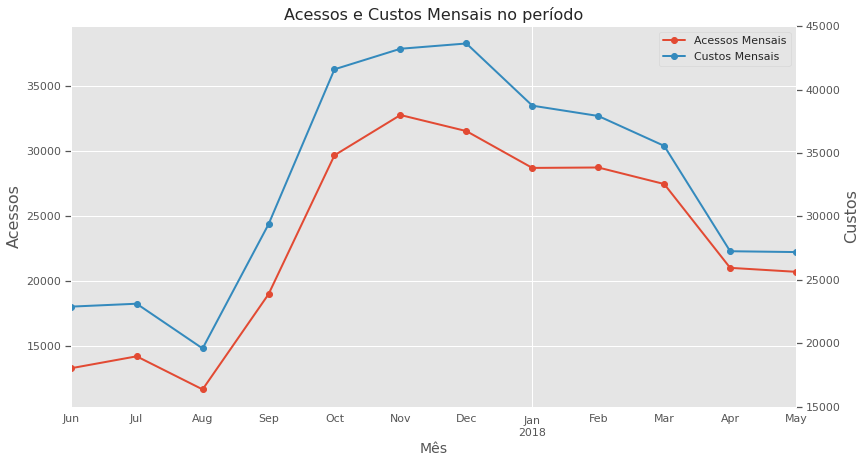

In [186]:

monthly_costs_total_ = pd.DataFrame(monthly_costs_total).reset_index()
monthly_costs_total_= monthly_costs_total_.rename(columns = {'costs_month':'visits_month','costs':'costs'})
total_mau_ = total_mau.rename(columns = {'visits_month':'visits_month','uid':'visits'}).reset_index()

ax = total_mau_.plot(x='visits_month', y='visits', marker='o', linewidth=2, label='Acessos Mensais',figsize=(13, 7))
monthly_costs_total_.plot(ax=ax, x='visits_month', y='costs', marker='o', linewidth=2, label='Custos Mensais')
ax.set_xlabel('Mês', fontsize=14)
ax.set_ylabel('Acessos', fontsize=16)

ax2 = ax.twinx()
ax2.set_ylabel('Custos', fontsize=16)
ax2.set_ylim((15000,45000))
ax.set_title("Acessos e Custos Mensais no período",size=16)
plt.grid(axis="both", color='grey', which='major')
plt.style.use("ggplot")
plt.show()

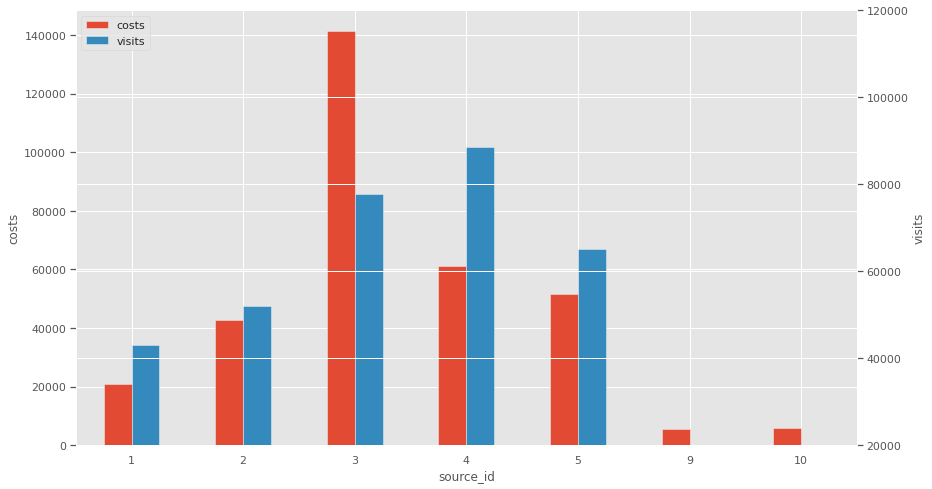

In [187]:
visits_device_ = visits_date.groupby(['source_id']).agg({'uid': 'count'}).head()
surce_merge = pd.merge(monthly_costs_source,visits_device_,on='source_id', how='left').reset_index()
surce_merge = surce_merge.rename(columns = {'source_id':'source_id','uid':'visits','costs':'costs'}).fillna(0).round()
surce_merge['visits'] = surce_merge['visits'].astype('int')


plt.style.use("ggplot")
ax = surce_merge.plot(kind='bar', x='source_id', rot=0,figsize=[14,8])
ax.legend(loc='upper left')


ax2 = ax.twinx()
ax2.set_ylabel('visits')
ax.set_ylabel('costs')
ax2.set_ylim((20000,120000))
plt.show()

Após juntar os gráficos percebe-se o comportamento assimétrico entre custos e acessos por fontes. As fontes 1 e 2 apresentam uma performance positia entre custo/acesso. A fonte 5 um poco maior do que as anteriores. A que se sobressai de todas é a fonte 4 com um performance excepcional entre custo/retorno. Já a fonte 3, que mais recebeu o dobro de receita comprado à fonte 4, ficou atrás da mesma em quase 20%. As fontes 9 e 10 receberam receitas porém não tiveram retorno.

No tópico seguinte foi calculado o ROMI (retorno sobre o investimento em marketing). Foram feitos os filtros e agrupamentos necessários para s obter a tabela com a soma acumulada do período. Pela tabela, observa-se que, mesmo os usuários gerando um retorno médio de 10.20 e cada usuário custando ao marketing 7.65 observa-se que o retorno se paga ao longo do período. Isso é verificado pela tabelas e gráficos, onde nota-se que a cohort do mês 06-2017 demonstra que os investimentos em marketing foram pagos a partir do 6º mês. A cohort do mês 09-2017 continua se destacando com seus valores atípicos. Em média, as cohorts pagam seus investimentos entre 7 e 8 meses.

Sendo assim, seguem alguns insights para o departamento de marketing otimizar os custos:

 - Acessos à plataforma:
     - nos dias atuais é imprescindível que todo produto/serviço tenha seu sistema adaptado para  mundo mobile. É necessário veificar quais motivos os acessos por esse tipo de aparelho é tão baixo e resolver esses problemas (adaptar site/app, problemas de pagamento, etc);
     - Em geral os usuários passam pouco tempo na plataforma. Isso é ruim porque com o curto espaço de tempo o usuário pode não acessar novidades/promoções relacionados aos produtos/serviços. Pesquisas do Google Analytics demostram que o volume de vendas estão diretamente ligados ao tempo que o usuário passa visualizando produtos/serviços;

 - Fontes de Usuários:
     - concetrar os investimentos ns fontes 1, 2 e aumentar o investimento nas fontes 4 e 5
     - reduzir o investimento na fonte 3 e eliminar as fontes 9 e 10
     
Como não há informações a respeito do produto/serviço bem como do público-alvo a que se destina, não foi possivel verificar os motivos da sazonalidade na receita, bem como dos acessos à plataforma, restrigindo-se somente a uma análise superficial demonstrada pelos números.